## Objective- To estimate the revenue figure of uber in a year in NY and it's growth and also aimed to expose all the interesting insights that can be derived from a detailed analysis of the dataset.

In [ ]:
#1 libraries import

In [1]:
import sys
print(sys.version)
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
from datetime import datetime
from datetime import time
import matplotlib.pyplot as plt
# datetime.datetime - represents a single point in time, including a date and a time.
# datetime.date - represents a date (year, month, and day) without a time.
# datetime.time - represents a time (hour, minute, second, and microsecond) without a date.
# datetime.timedelta - represents a duration, which can be used to perform arithmetic with datetime objects
sns.set()
pal = sns.hls_palette(10, h=.5)
sns.set_palette(pal)

#Avoid display of scientific notation and show precision of 4 decimals:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]


In [2]:
#Reading csv file

df = pd.read_csv('Uber_nyc_data.csv')

In [3]:
# Preprocessing

In [4]:
#finding general information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   origin_taz       object 
 2   destination_taz  object 
 3   pickup_datetime  object 
 4   trip_distance    float64
 5   trip_duration    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ GB


In [5]:
df.describe()

,id,trip_distance
count,30925738.0000,30925700.0000
mean,15462869.5000,5.1999
std,8927491.7239,6.1529
min,1.0000,0.0000
25%,7731435.2500,1.6900
50%,15462869.5000,3.0900
75%,23194303.7500,6.2300
max,30925738.0000,2593.0800


In [6]:
df

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.2500,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.1700,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.0200,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.4600,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.3100,0:26:17
...,...,...,...,...,...,...
30925733,30693431,15,15,2015-09-01 00:00:00,6.8600,0:27:37
30925734,30693447,5B,2A,2015-09-01 00:00:00,3.4400,0:11:07
30925735,30693461,4C,NaN,2015-09-01 00:00:00,6.1700,0:19:10
30925736,30693466,2A,5A,2015-09-01 00:00:00,1.8700,0:07:54


In [7]:
#calculating number of rows and column
df.shape[0],df.shape[1]    #(rows,column)

(30925738, 6)

In [8]:
#finding null entries
df.isnull().sum()

id                       0
origin_taz               0
destination_taz    1273023
pickup_datetime          0
trip_distance           38
trip_duration           38
dtype: int64

In [9]:
#finding duplicate values
len(df[df.duplicated() == True])

0

In [10]:
df.origin_taz.unique()


array(['7C', '7B', '11', '3B', '2A', '5B', '10', '2B', '9', '6B', '15',
       '4C', '5A', '8', '14', '4A', '7A', '1', '16', '3A', '2C', '6A',
       '12', '13', '3C', '4B', '5C', '17'], dtype=object)

In [11]:
df.destination_taz.unique()

array(['6A', '15', '2A', '4A', '10', '4C', '7A', '3C', '5B', '14', '8',
       nan, '7C', '12', '2C', '1', '6B', '5C', '9', '3A', '2B', '11',
       '7B', '5A', '13', '4B', '18', '16', '3B', '17'], dtype=object)

In [12]:
df['destination_taz'].mode()

0    2A
Name: destination_taz, dtype: object

In [13]:
df38 = df[df.trip_duration.isnull() & df.trip_distance.isnull()]
#df38
df38.head(38)
# On Investigation we that all **38 records with values missing for trip distance and duration from the same rows**,
#but origin and distination is not missing which means trip done ad revenue generated through it

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15155317,39535,2A,11,2015-04-25 12:00:00,NaN,NaN
15245057,1009076,2A,2A,2015-04-26 01:00:00,NaN,NaN
16519652,15028665,2A,7C,2015-04-29 21:00:00,NaN,NaN
17148253,22250173,2A,2A,2015-04-12 02:00:00,NaN,NaN
17297563,23716998,2C,11,2015-04-25 13:00:00,NaN,NaN
17478943,25656087,7A,4C,2015-04-29 08:00:00,NaN,NaN
17980063,544754,10,15,2015-05-09 02:00:00,NaN,NaN
18385948,4428619,6B,2A,2015-05-20 19:00:00,NaN,NaN
18420794,4897670,9,7A,2015-05-12 06:00:00,NaN,NaN
18432788,4909664,2C,5C,2015-05-20 09:00:00,NaN,NaN


In [17]:
import datetime
import time
def dateParser(s):
    return datetime.datetime(int(s[0:4]), int(s[5:7]), int(s[8:10]), int(s[11:13]))
#Apply parser to data
t0 = time.time()
df['pu_date_hour'] = df.pickup_datetime.apply(dateParser)
time.time() - t0

36.400463819503784

In [19]:
#Data encompasses exactly 365 days from Sept 1st, 2014 to Sep 1st, 2015.
beginning = df.pu_date_hour.min()
end = df.pu_date_hour.max()
print(beginning, end, end - beginning)

2014-09-01 00:00:00 2015-09-01 00:00:00 365 days 00:00:00


In [20]:
# feature enginnering
#1.converting pickup_datetime to date,year,month,day,hour to analyse univariate analysis

In [21]:
#converting pickup object datatype into datatime datatype
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   origin_taz       object        
 2   destination_taz  object        
 3   pickup_datetime  datetime64[ns]
 4   trip_distance    float64       
 5   trip_duration    object        
 6   pu_date_hour     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 1.6+ GB


In [23]:
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_time'] = df['pickup_datetime'].dt.time
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday

In [24]:
#conveting trip duration time  into minute to analysis null value, outliers etc


def duration_to_minutes(s):
    """
    Function that takes a string with the hh:mm:ss format and
    returns the integer equivalent of the total time in minutes, 
    or zero for missing values in a Pandas dataframe.
    """
    if pd.isnull(s):
        val = 0 #note: this fills with 0 the 38 instances with null (missing) values
    else:
        hms = s.split(':')
        val = int(hms[0])*60 + int(hms[1]) + int(hms[2])/60.0
    return val

In [25]:
import datetime
import time

#Transform the trip duration string into trip duration in minutes:
t0 = time.time()
df['duration_min'] = df.trip_duration.apply(duration_to_minutes) 
time.time() - t0

34.99279165267944

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   origin_taz       object        
 2   destination_taz  object        
 3   pickup_datetime  datetime64[ns]
 4   trip_distance    float64       
 5   trip_duration    object        
 6   pu_date_hour     datetime64[ns]
 7   pickup_date      object        
 8   pickup_year      int64         
 9   pickup_month     int64         
 10  pickup_day       int64         
 11  pickup_time      object        
 12  pickup_hour      int64         
 13  pickup_weekday   int64         
 14  duration_min     float64       
dtypes: datetime64[ns](2), float64(2), int64(6), object(5)
memory usage: 3.5+ GB


In [27]:
#Get the mean distance and duration for each origin-destination pair
df_DistDur = df.groupby(['origin_taz', 'destination_taz'])[['trip_distance', 'duration_min']].mean()

In [28]:
df_DistDur.head(50)

trip_distance  duration_min
origin_taz destination_taz                             
1          1                       1.4219       10.5655
           10                      3.6508       17.9776
           11                      5.0937       22.4899
           12                      8.8878       29.1024
           13                     11.5831       32.1568
           14                     14.0645       38.9106
           15                      7.1042       27.3468
           16                     15.4904       40.1718
           17                     16.8236       36.7168
           18                     14.9147       36.8338
           2A                      2.0902       13.0160
           2B                      2.7660       15.4510
           2C                      3.3962       17.3539
           3A                      3.2236       16.5423
           3B                      4.0032       20.3614
           3C                      4.5640       22.8579
           4A                      3.5453       19.8811
           4B                      4.2927       24.2438
           4C                      5.0721       27.3084
           5A                      4.2286       19.1968
           5B                      5.0213       21.4280
           5C                      5.7442       24.9500
           6A                      6.0787       27.9620
           6B                      7.0928       26.8000
           7A                      7.5071       29.7796
           7B                      8.3662       28.5142
           7C                     10.2862       32.5669
           8                      13.2086       36.8850
           9                      20.4664       51.2327
10         1                       3.6201       17.6777
           10                      1.7033       10.8102
           11                      4.4237      100.9416
           12                      8.2903       27.0544
           13                     10.7411       27.7289
           14                     11.1641       33.1197
           15                      3.5992       16.9955
           16                     17.5233       43.2349
           17                     13.9442       33.4857
           18                     18.5216       44.6277
           2A                      4.2257       20.7187
           2B                      5.5830       27.0491
           2C                      5.4115       24.6535
           3A                      6.2837       28.8973
           3B                      6.9257       31.7334
           3C                      7.6443       34.5144
           4A                      6.3090       30.1554
           4B                      7.2416       34.1364
           4C                      8.1334       35.9972
           5A                      6.2945       26.4799
           5B                      7.2757       27.4879

In [29]:
#Replace 38 missing values with the average distance and duration for the respective origin-destination pair
for i in df38.index:
    orig = df.loc[i, 'origin_taz']
    dest = df.loc[i, 'destination_taz']
    df.loc[i, 'trip_distance'] = df_DistDur.loc[orig, dest].trip_distance
    df.loc[i, 'duration_min'] = df_DistDur.loc[orig, dest].duration_min

In [30]:
#Drop redundant trip_duration columns
df= df.drop('trip_duration', axis=1)
df= df.drop('pickup_datetime', axis=1)

In [31]:
df.isnull().sum()

id                       0
origin_taz               0
destination_taz    1273023
trip_distance            0
pu_date_hour             0
pickup_date              0
pickup_year              0
pickup_month             0
pickup_day               0
pickup_time              0
pickup_hour              0
pickup_weekday           0
duration_min             0
dtype: int64

In [32]:
#Calculate average trip speed (mph) to help in understanding outliers (like trips with duration >10 h):
df['trip_mph_avg'] = df.trip_distance/(df.duration_min/60.0)

In [33]:
#estimatimating revenue
#Source: http://uberestimate.com/prices/New-York-City/ for Uber X
base_fare = 2.55
per_minute = 0.35
per_mile = 1.75
min_fare = 8

In [34]:
#Using eval() is even more efficient for large datasets than resorting to Numpy! 
#Local variables must be followed by @. Only for arithmetic, cannot use if statement, for example.
df['est_revenue'] = df.eval('@base_fare + duration_min * @per_minute + trip_distance * @per_mile')
df.loc[df.est_revenue < 8, 'est_revenue'] = min_fare

In [35]:
#outliers detection

<Axes: >

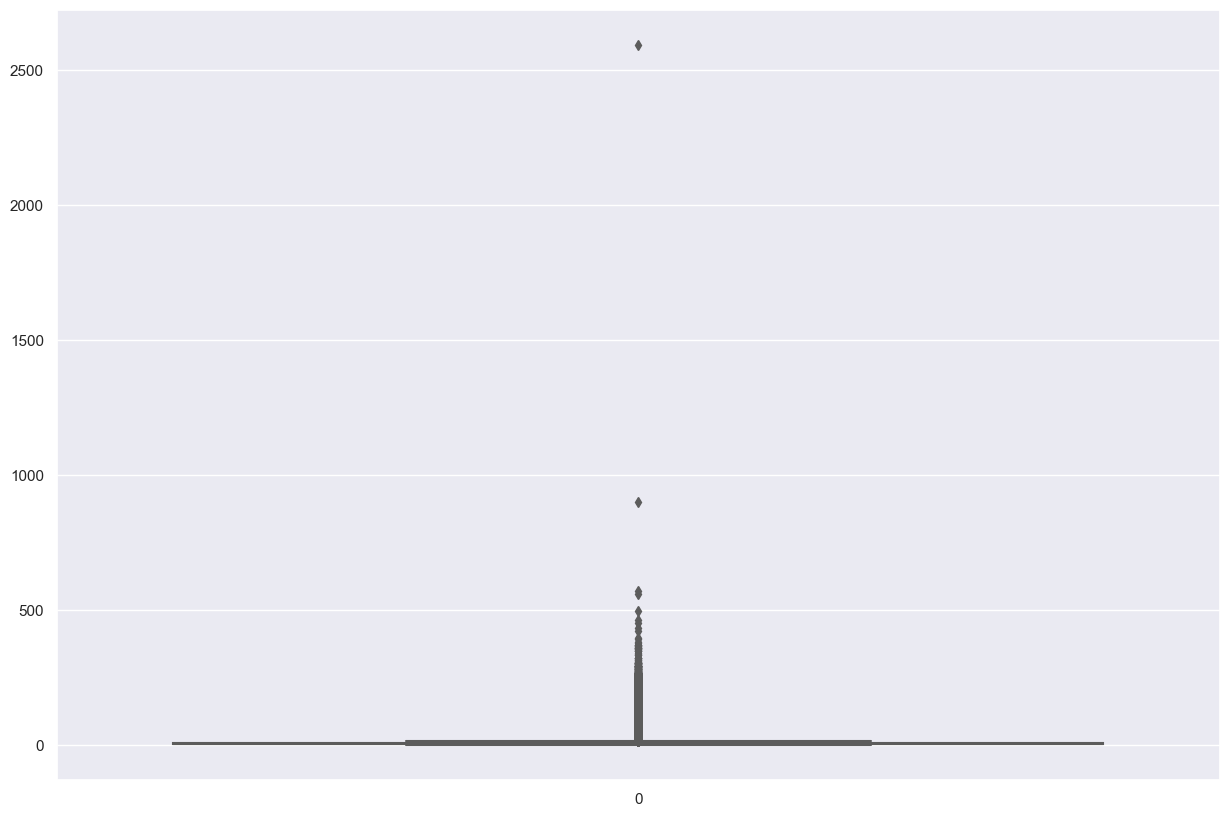

In [36]:
plt.figure(figsize = (15, 10))
sns.boxplot(df['trip_distance'])

In [37]:
df['trip_distance'].describe()

count   30925738.0000
mean           5.1999
std            6.1528
min            0.0000
25%            1.6900
50%            3.0900
75%            6.2300
max         2593.0800
Name: trip_distance, dtype: float64

<Axes: >

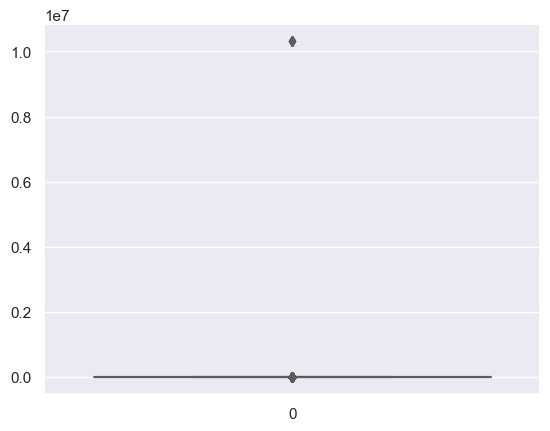

In [38]:
sns.boxplot(df['duration_min'])

In [39]:
df['duration_min'].describe()

count   30925738.0000
mean          22.3337
std         3712.2298
min            0.0000
25%           10.8500
50%           17.2333
75%           26.6833
max     10321959.0500
Name: duration_min, dtype: float64

In [40]:
#Get the federal holidays for the period (useful for analyzing data later)

In [41]:
#Get all federal holidays in the period
from pandas.tseries.holiday import USFederalHolidayCalendar

#if return_name is True, then name is series value and date is the series index, otherwise date is series value. 
holidays = USFederalHolidayCalendar().holidays(beginning, end, return_name = True) 
holidays

2014-09-01                              Labor Day
2014-10-13                           Columbus Day
2014-11-11                           Veterans Day
2014-11-27                       Thanksgiving Day
2014-12-25                          Christmas Day
2015-01-01                         New Year's Day
2015-01-19    Birthday of Martin Luther King, Jr.
2015-02-16                  Washington’s Birthday
2015-05-25                           Memorial Day
2015-07-03                       Independence Day
dtype: object

In [42]:
#Extract the weekday for each holiday
holidays.index.map(lambda x: x.strftime('%a'))

Index(['Mon', 'Mon', 'Tue', 'Thu', 'Thu', 'Thu', 'Mon', 'Mon', 'Mon', 'Fri'], dtype='object')

In [43]:
#For completeness, let's add the day before and after the holidays (better: add day after if Thursday)
holidays_all = pd.concat([holidays, "Day After " + holidays.shift(1, 'D'), "Day Before " + holidays.shift(-1, 'D')])
holidays_all = holidays_all.sort_index()
holidays_all.head(10)

2014-08-31           Day Before Labor Day
2014-09-01                      Labor Day
2014-09-02            Day After Labor Day
2014-10-12        Day Before Columbus Day
2014-10-13                   Columbus Day
2014-10-14         Day After Columbus Day
2014-11-10        Day Before Veterans Day
2014-11-11                   Veterans Day
2014-11-12         Day After Veterans Day
2014-11-26    Day Before Thanksgiving Day
dtype: object

In [44]:
#Check for very long duration entries, and effect on revenue numbers:
#Greater than 100h: 7 entries (erroneous): system error? fraud? Total revenue is relevant: $14,459,978 (2.4% of total)
#probable system error: distance < 10 miles


# The effect on revenue is relevant only for the trips higher than 100h of duration, which are most likely a result of 
# some system error (as seen above), or perhaps fraud, therefore these 7 entries will be excluded from the dataset for analysis. 
# However, assuming that driving more than 16h (960 minutes) non-stop per day represents unreliable data,these additional 116 cases will also be excluded from analysis. 
# These 123 data points warrant more in-depth internal investigation to bring light to what may have caused them.
# >=100h:

print(len(df[(df.duration_min >= 6000)])) #7
df[(df.duration_min >= 6000)].est_revenue.sum()

7


14459977.979999999

In [45]:
#>16h and <100h : 116 entries
print(len(df[(df.duration_min > 960) & (df.duration_min < 6000)]))
df[(df.duration_min > 960) & (df.duration_min < 6000)].est_revenue.sum() #$78,070 total revenue

116


78069.74916666666

In [72]:
#trip for which both trip distance and duration is zero which means that trip cancellation 
#There is at least one case almost daily. 
#The 24866 cases represent a revenue of 198,928,𝑏𝑎𝑠𝑒𝑑𝑜𝑛198,928,
#based on 8 minimum fare

print(len(df[(df.duration_min == 0) & (df.trip_distance == 0)]))

24866


In [47]:
#because there is charge for trip cancellation so minimum fair is recieved
df[(df.duration_min == 0) & (df.trip_distance == 0) & (df.origin_taz != df.destination_taz)].head()

,id,origin_taz,destination_taz,trip_distance,pu_date_hour,pickup_date,pickup_year,pickup_month,pickup_day,pickup_time,pickup_hour,pickup_weekday,duration_min,trip_mph_avg,est_revenue
21726,274307,4B,8,0.0000,2014-09-29 17:00:00,2014-09-29,2014,9,29,17:00:00,17,0,0.0000,NaN,8.0000
21847,274428,4C,2A,0.0000,2014-09-29 17:00:00,2014-09-29,2014,9,29,17:00:00,17,0,0.0000,NaN,8.0000
21909,274490,5C,6A,0.0000,2014-09-29 19:00:00,2014-09-29,2014,9,29,19:00:00,19,0,0.0000,NaN,8.0000
22179,274760,11,4A,0.0000,2014-09-29 17:00:00,2014-09-29,2014,9,29,17:00:00,17,0,0.0000,NaN,8.0000
22359,274940,3C,1,0.0000,2014-09-30 14:00:00,2014-09-30,2014,9,30,14:00:00,14,1,0.0000,NaN,8.0000


In [48]:
# Check cases with distance equal to zero but duration greater than zero
print(len(df[(df.duration_min > 0) & (df.trip_distance == 0)])) #85515
#The median duration for trips with zero distance is 10 seconds (mean= 2.4 minutes), so most of these 85,515 cases possibly represent trips 
#that were cancelled right after they were registered

85515


In [49]:
df[(df.duration_min >= 5) & (df.trip_distance == 0) &(df.origin_taz != df.destination_taz)].head(10)
#check the small dataset (277) out of the 3873 cases with duration > 5 minutes, but distance equal to zero:
#Maybe these cases represent some error with registering the distance traveled?

,id,origin_taz,destination_taz,trip_distance,pu_date_hour,pickup_date,pickup_year,pickup_month,pickup_day,pickup_time,pickup_hour,pickup_weekday,duration_min,trip_mph_avg,est_revenue
882890,18153735,1,2A,0.0000,2014-09-28 01:00:00,2014-09-28,2014,9,28,01:00:00,1,6,7.1167,0.0000,8.0000
3223424,29754237,4C,6A,0.0000,2014-10-05 20:00:00,2014-10-05,2014,10,5,20:00:00,20,6,7.5167,0.0000,8.0000
18154210,2023861,1,4C,0.0000,2015-05-28 12:00:00,2015-05-28,2015,5,28,12:00:00,12,3,27.2000,0.0000,12.0700
18829282,8785823,4B,8,0.0000,2015-05-26 16:00:00,2015-05-26,2015,5,26,16:00:00,16,1,38.7833,0.0000,16.1242
19414939,14586763,4C,5C,0.0000,2015-05-28 18:00:00,2015-05-28,2015,5,28,18:00:00,18,3,11.0167,0.0000,8.0000
20674992,27149481,4C,1,0.0000,2015-05-28 11:00:00,2015-05-28,2015,5,28,11:00:00,11,3,32.8500,0.0000,14.0475
21376632,3045165,1,6B,0.0000,2015-06-28 23:00:00,2015-06-28,2015,6,28,23:00:00,23,6,32.8167,0.0000,14.0358
21472913,4006319,15,4A,0.0000,2015-06-26 10:00:00,2015-06-26,2015,6,26,10:00:00,10,4,55.7333,0.0000,22.0567
21517547,4482860,1,5C,0.0000,2015-06-23 13:00:00,2015-06-23,2015,6,23,13:00:00,13,1,22.3500,0.0000,10.3725
21727436,6421520,6B,NaN,0.0000,2015-06-26 09:00:00,2015-06-26,2015,6,26,09:00:00,9,4,78.2333,0.0000,29.9317


In [50]:
df[(df.duration_min >= 5) & (df.trip_distance == 0) &(df.origin_taz != df.destination_taz)].head(10)
#check the small dataset (277) out of the 3873 cases with duration > 5 minutes, but distance equal to zero:
#Maybe these cases represent some error with registering the distance traveled?

,id,origin_taz,destination_taz,trip_distance,pu_date_hour,pickup_date,pickup_year,pickup_month,pickup_day,pickup_time,pickup_hour,pickup_weekday,duration_min,trip_mph_avg,est_revenue
882890,18153735,1,2A,0.0000,2014-09-28 01:00:00,2014-09-28,2014,9,28,01:00:00,1,6,7.1167,0.0000,8.0000
3223424,29754237,4C,6A,0.0000,2014-10-05 20:00:00,2014-10-05,2014,10,5,20:00:00,20,6,7.5167,0.0000,8.0000
18154210,2023861,1,4C,0.0000,2015-05-28 12:00:00,2015-05-28,2015,5,28,12:00:00,12,3,27.2000,0.0000,12.0700
18829282,8785823,4B,8,0.0000,2015-05-26 16:00:00,2015-05-26,2015,5,26,16:00:00,16,1,38.7833,0.0000,16.1242
19414939,14586763,4C,5C,0.0000,2015-05-28 18:00:00,2015-05-28,2015,5,28,18:00:00,18,3,11.0167,0.0000,8.0000
20674992,27149481,4C,1,0.0000,2015-05-28 11:00:00,2015-05-28,2015,5,28,11:00:00,11,3,32.8500,0.0000,14.0475
21376632,3045165,1,6B,0.0000,2015-06-28 23:00:00,2015-06-28,2015,6,28,23:00:00,23,6,32.8167,0.0000,14.0358
21472913,4006319,15,4A,0.0000,2015-06-26 10:00:00,2015-06-26,2015,6,26,10:00:00,10,4,55.7333,0.0000,22.0567
21517547,4482860,1,5C,0.0000,2015-06-23 13:00:00,2015-06-23,2015,6,23,13:00:00,13,1,22.3500,0.0000,10.3725
21727436,6421520,6B,NaN,0.0000,2015-06-26 09:00:00,2015-06-26,2015,6,26,09:00:00,9,4,78.2333,0.0000,29.9317


In [51]:
print(len(df[df.trip_mph_avg <= 3])) #262,666 cases

262666


In [52]:
df[(df.trip_mph_avg <= 3) & (df.trip_distance <= 2)].head(10) #246,225, or ~94% of all trips with < 3mph
#Considering that some really bad traffic is possible, 
#let's check the proportion of cases that fall under 2 miles or less traveled distance

,id,origin_taz,destination_taz,trip_distance,pu_date_hour,pickup_date,pickup_year,pickup_month,pickup_day,pickup_time,pickup_hour,pickup_weekday,duration_min,trip_mph_avg,est_revenue
82,252663,14,14,0.0200,2014-09-01 11:00:00,2014-09-01,2014,9,1,11:00:00,11,0,1.3333,0.9000,8.0000
120,252701,2A,2A,1.5100,2014-09-01 20:00:00,2014-09-01,2014,9,1,20:00:00,20,0,33.8833,2.6739,17.0517
271,252852,8,8,0.0000,2014-09-01 16:00:00,2014-09-01,2014,9,1,16:00:00,16,0,0.5000,0.0000,8.0000
542,253123,4C,4C,0.0500,2014-09-02 17:00:00,2014-09-02,2014,9,2,17:00:00,17,1,1.1000,2.7273,8.0000
554,253135,2A,2A,0.0000,2014-09-02 09:00:00,2014-09-02,2014,9,2,09:00:00,9,1,2.6833,0.0000,8.0000
605,253186,2A,2A,0.0500,2014-09-02 20:00:00,2014-09-02,2014,9,2,20:00:00,20,1,1.4500,2.0690,8.0000
839,253420,2A,2A,0.4700,2014-09-02 13:00:00,2014-09-02,2014,9,2,13:00:00,13,1,10.5833,2.6646,8.0000
896,253477,5C,6B,0.9900,2014-09-02 17:00:00,2014-09-02,2014,9,2,17:00:00,17,1,22.1833,2.6777,12.0467
945,253526,14,14,0.0400,2014-09-02 02:00:00,2014-09-02,2014,9,2,02:00:00,2,1,1.4000,1.7143,8.0000
1260,253841,4A,4A,0.0600,2014-09-02 20:00:00,2014-09-02,2014,9,2,20:00:00,20,1,1.3500,2.6667,8.0000


In [54]:
#1. 2.4% to total revenue estimated by considering trip duration greater than 100 hour would be sysytem error and should not be considered for revenue estimation and even the trip duration greater than 16 hour also not reliable that is also excluded for revenue estimation.

#2. 24866 cases are cancelled trips that should not be included in revenue estimation.

#3. Average speed less than 3km(i.e. less than walking speed) could be error,fraud or really bad traffic.

In [55]:
#Data Visualization

In [56]:
df_viz = df[(df.pickup_date != datetime.date(2015, 9, 1)) & (df.duration_min <= 960)].copy()

In [57]:
print(len(df_viz))

30923763


In [58]:
#Descriptive statistics for numerical features:
df_viz[['duration_min', 'trip_distance', 'trip_mph_avg', 'est_revenue']].describe()

,duration_min,trip_distance,trip_mph_avg,est_revenue
count,30923763.0000,30923763.0000,30898897.0000,30923763.0000
mean,20.9923,5.1996,13.5071,19.2419
std,16.0846,6.1308,11.7569,15.0809
min,0.0000,0.0000,0.0000,8.0000
25%,10.8500,1.6900,8.4098,9.5733
50%,17.2333,3.0900,11.4488,14.3508
75%,26.6833,6.2300,16.2667,23.0308
max,959.3000,568.5700,22548.0000,1225.8583


In [63]:
#Required by Plotly:
import matplotlib.mlab as mlab
#import plotly.plotly as py

In [64]:
from matplotlib.ticker import FuncFormatter #Call formatter function to format tick values
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) #Create image box
#from matplotlib._png import read_png #Load png file
from matplotlib.patches import Ellipse #Draw ellipse

In [65]:
#Create functions to format tick numbers
def thousands_comma(x, pos):
    """
    Args are the value and tick position. 
    Returns number with thousands comma and no decimals.
    """
    return '{:,.0f}'.format(x) #this is the new syntax for formatting

def thousands_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of thousands with one decimal, and K in lieu of 3 zeros.
    """
    return '{:.0f}{}'.format(x * 1e-3, 'K') #old syntax: '%1.0fK' % (x * 1e-3)

def millions_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of millions with one decimal, and M in lieu of 6 zeros.
    """
    return '{:.1f}{}'.format(x * 1e-6, 'M')

def millions_currency(x, pos):
    """
    Args are the value and tick position. 
    Returns number of millions with a $ sign, M in lieu of 6 zeros, and no decimals.
    """
    return '{}{:.0f}{}'.format('$', x * 1e-6, 'M')


In [66]:
#Define robust function to automatically add annotated labels on bar plots.
#Inspiration from http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/

def annotate_labels(ax, labels_list, **kwargs):
    """
    Function to automatically add labels on bar charts.
    It takes a plot axis, an ordered list of labels, and text kwargs.
    """
    
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    rects = ax.patches

    for rect, label in zip(rects, labels_list):
        height = rect.get_height()
        p_height = (height / y_height) # Fraction of axis height taken up by this rectangle
        label_position = height + (y_height * 0.01)
        ax.text(rect.get_x() + rect.get_width()/2., label_position, label, kwargs)
        return None

* Above defined functions is to represent large numbers in thousands(K) and millions(M) format.

## Visualizing the demand : number of Uber trips per day

In [74]:

#Create a plotting dataframe with counts (number of trips) grouped by day:
byDate = df_viz.groupby('pickup_date')['id'].count() #365 complete entries
byDate.head()

pickup_date
2014-09-01    31592
2014-09-02    41496
2014-09-03    46339
2014-09-04    53402
2014-09-05    59718
Name: id, dtype: int64

In [76]:
byDate

pickup_date
2014-09-01     31592
2014-09-02     41496
2014-09-03     46339
2014-09-04     53402
2014-09-05     59718
               ...  
2015-08-27    108594
2015-08-28    114108
2015-08-29    123387
2015-08-30    116620
2015-08-31     95583
Name: id, Length: 365, dtype: int64

In [88]:

from datetime import date
a=pd.to_datetime("2014-10-28").date()
b=pd.to_datetime("2014-11-5").date()
byDate[a: b] #an uptick in rides on 11/1, the day before the NYC marathon!


pickup_date
2014-10-28     52084
2014-10-29     61082
2014-10-30     66369
2014-10-31     71787
2014-11-01    104450
2014-11-02     57289
2014-11-03     50491
2014-11-04     52395
2014-11-05     61518
Name: id, dtype: int64

In [89]:
#byDate['2015-06-01': '2015-08-31'].mean()

In [ ]:
# !ls Data/icons

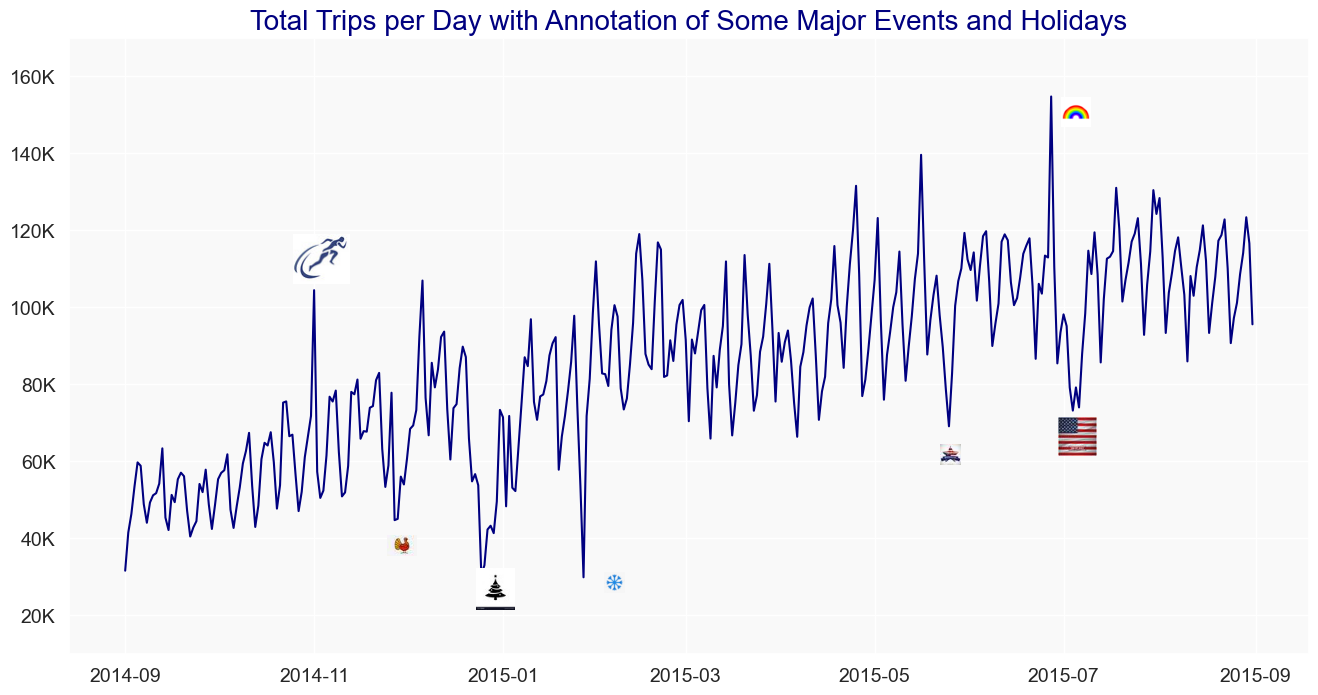

In [90]:
#Create a plot with the total number of trips per day, highlighting some changepoints associated with major holidays 
#and other weather and touristic/cultural events.
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.ticker import FuncFormatter
from matplotlib.image import imread

fig = plt.figure()

ax = byDate.plot(figsize = (16, 8), fontsize = 12, ylim = (10000, 170000), color = 'navy')

formatter = FuncFormatter(thousands_format)
ax.yaxis.set_major_formatter(formatter)
ax.set_facecolor('#F9F9F9') #make background color a lighter gray to better contrast with the icon's images.

plt.title('Total Trips per Day with Annotation of Some Major Events and Holidays', fontsize= 20, color='navy')
plt.tick_params(labelsize=14)
plt.xlabel('')


#Add icon to indicate snowstorm on the plot:
#NYC's mayor ordered the city under curfew, and public transportation system was shut down late on 1/26/15.
img1 = imread('Snow.png')
imagebox = OffsetImage(img1, zoom=0.6)
xy = [pd.to_datetime('2015-01-27').date(), 25000] # (len(byDate[:'2015-01-27'])-1, byDate['2015-01-27'])

ab = AnnotationBbox(imagebox, xy, 
                    xybox=(22., 10.), #position from xy to lower left corner of box
                    xycoords='data', #will use data coordinates for x and y
                    boxcoords='offset points', #same idea as textcoords, in points from lower left corner
                    pad=0.1, frameon=False) #padding around the image
ax.add_artist(ab)


#Add icon to indicate Thanksgiving on the plot:
img2 = imread('thanksgiving.jpg')
imagebox = OffsetImage(img2, zoom=0.6) 
xy = [pd.to_datetime('2014-11-27').date(), 40000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -5.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)
#Add icon to indicate Christmas on the plot:
img2 = imread('ctree.jpg')
imagebox = OffsetImage(img2, zoom=0.6) 
xy = [pd.to_datetime('2014-12-25').date(), 25000] 
ab = AnnotationBbox(imagebox, xy, xybox=(10., 5.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Memorial Day Holiday on the plot:
img3 = imread('mday.jpg')
imagebox = OffsetImage(img3, zoom=0.6) 
xy = [pd.to_datetime('2015-05-25').date(), 60000] 
ab = AnnotationBbox(imagebox, xy, xybox=(1., 5.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Pride Week on the plot:
#According to The Wall Street Journal, the Pride Parade was attended by 1.6 million people in 2015.
img4 = imread('rainbow.png')
imagebox = OffsetImage(img4, zoom=0.6) 
xy = [pd.to_datetime('2015-06-27').date(), 150000] 
ab = AnnotationBbox(imagebox, xy, xybox=(18., 2.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Independence Day Holiday on the plot:
img5 = imread('iday.jpg')
imagebox = OffsetImage(img5, zoom=0.6) 
xy = [pd.to_datetime('2015-07-03').date(), 70000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -10.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate NYC Marathon event on the plot:
img5 = imread('marathon.jpg')
imagebox = OffsetImage(img5, zoom=0.7) 
xy = [pd.to_datetime('2014-11-01').date(), 110000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., 7.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

plt.show()

* **The effect of major events on the number of trips**. 

 * negative impacts are related to Thanksgiving, Christmas, Memorial Day, and Independence Day. 
 * A lingering (two consecutive days) drop in activity is seen for all these holidays but Memorial Day. It turns out that the July 4th holiday was observed on Friday in 2015.

  * an apparently odd and very significant drop in the number of trips is shown on January 27th. This was a result of a curfew imposed by the NYC’s mayor in preparation for a blizzard.

 * The plot also highlights which events have positively impacted the number of trips that year, with the International Marathon and the Gay Pride Week standing out as the strongest contributors. # The effect of time on demand for Uber rides: distribution per hour, weekday, and month.

## The effect of time on demand for Uber rides: distribution per hour, weekday, and month.

In [91]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

In [92]:
type(df_viz.pickup_hour)

pandas.core.series.Series

In [93]:
df_viz.pickup_hour

0            9
1           18
2           17
3           13
4           14
            ..
30923881    22
30923882    22
30923883    22
30923884    20
30923885    23
Name: pickup_hour, Length: 30923763, dtype: int64

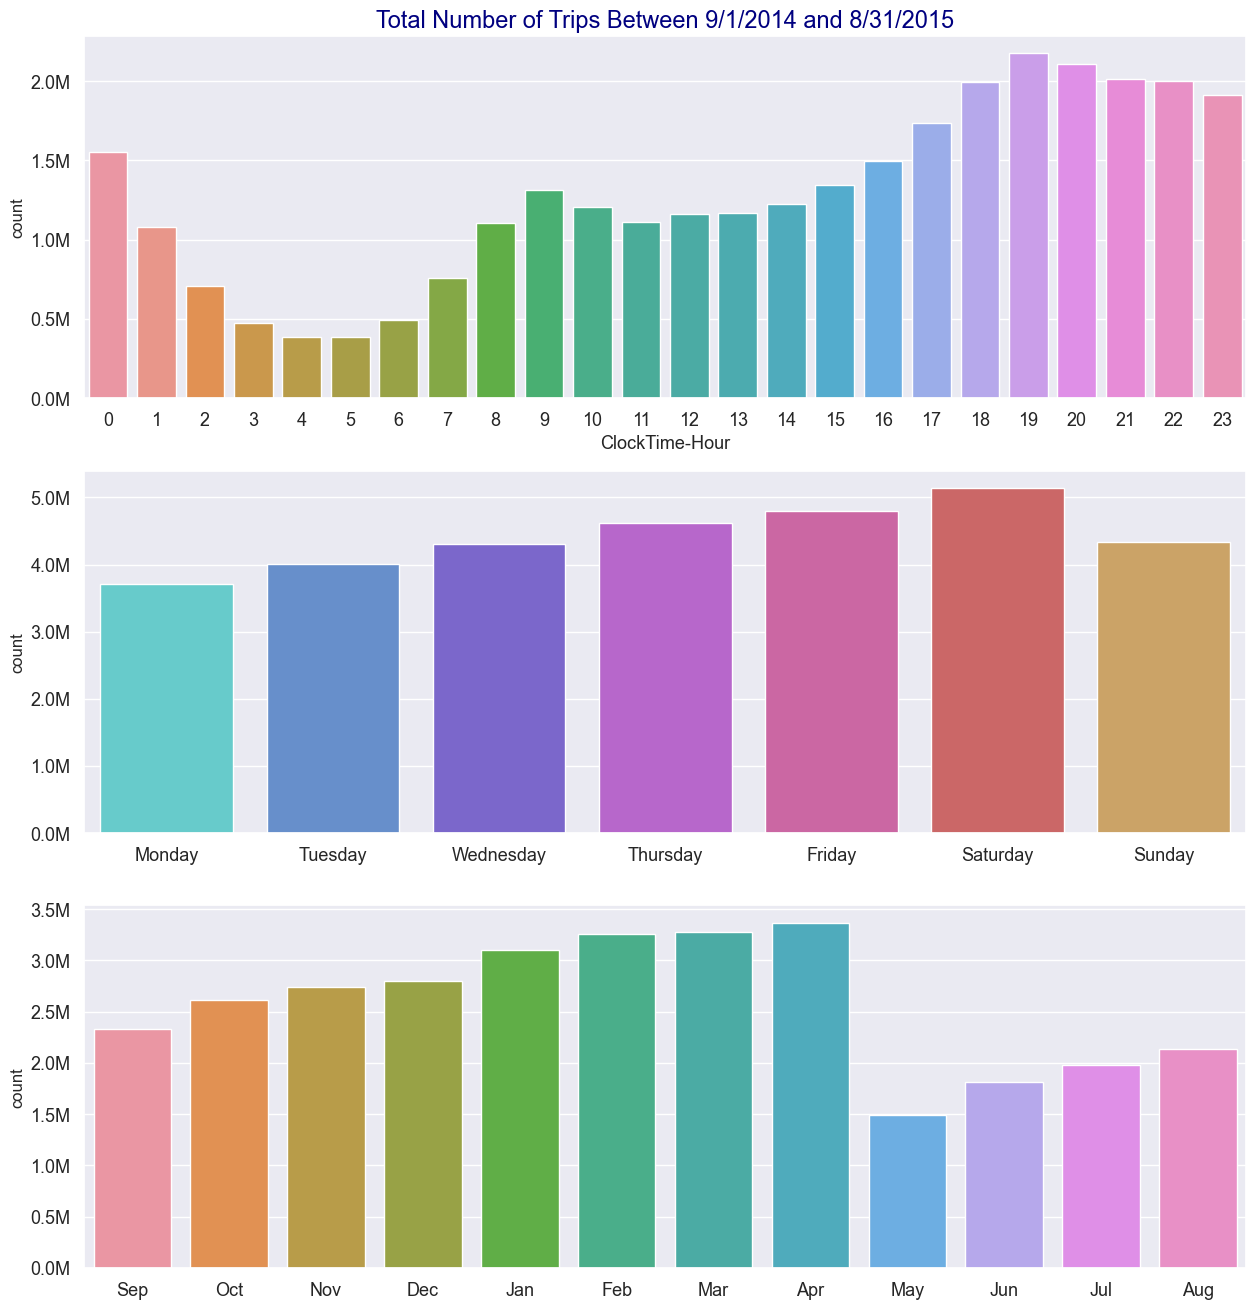

In [95]:
# Create plots comparing demand per different time categories:
fig = plt.figure(figsize = (15,16))
formatter = FuncFormatter(millions_format)

plt.subplot(3,1,1) #this plot could have a polar format, although I'm not sure it'd be a better viz.
ax1 = sns.countplot(data = df_viz, x = 'pickup_hour', order = range(24))
ax1.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.title('Total Number of Trips Between 9/1/2014 and 8/31/2015', fontsize=17, color='navy')
plt.xlabel('ClockTime-Hour', fontsize=13)

plt.subplot(3,1,2)
ax2 = sns.countplot(x = df_viz.pickup_weekday, order = range(7))
ax2.set_xticklabels(weekday_labels)
ax2.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.xlabel('')

plt.subplot(3,1,3) #same as the line plot but with less granularity, perhaps easier to visualize the MOM growth
ax3 = sns.countplot(x = df_viz.pickup_month)
ax3.set_xticklabels(month_labels)
ax3.yaxis.set_major_formatter(formatter)
#plt.text(0, 3100000, 'Consistent growth in the number of trips from month to month!', color='navy', size=15)
plt.tick_params(labelsize=13)
plt.xlabel('')

#fig.subplots_adjust(hspace=.5)
plt.show()

* In the bar charts above, we can see that the **demand for Uber is higher** from 4 PM until around midnight.
* In second chart demand is gradually increases from monday to saturday and **Saturday has the highest demand**. Interestingly, Sunday shows a level of demand similar to Wednesday, which is higher than Monday or Tuesday.
* When looking at the total demand per month along the period of time analyzed, seasonal effects are masked by the consistent month-to-month growth.



## Estimated Monthly Base Revenue: how much was the NYC market worth in the period?

* For the first time, it’s possible to estimate Uber’s revenue in NYC with more granularity due to the availability of each trip’s duration and distance in the dataset. However, the revenue figures are described as “base revenue“, because other critical information is missing.

* Uber offers different types of services with distinct prices, namely Uber X, Uber XL, Uber Black, Uber SUV, and Uber Pool. Except for the latter, all other services carry a higher fare than Uber X. Moreover, Uber practices “price surging”, which affects the revenue positively.

* Here we chose to use Uber X published fares to calculate the revenue as this is probably the most popular product. Therefore, **the base revenue is a conservative estimate of the actual revenue.**


In [96]:
#Create dataframe with grouped revenue data:
byDateRev = df_viz.groupby('pickup_month')['est_revenue'].sum()

In [97]:
#Estimate Uber's gross margin for the entire 1 year period based on 25% share of the base revenue.
sumRev = byDateRev.sum()
print("Base Revenue: ${:,.0f}M".format(sumRev * 1e-6), "\nUber's Base Gross Margin: ${:,.0f}".format(sumRev * .25))

Base Revenue: $595M 
Uber's Base Gross Margin: $148,757,755


In [98]:
#Estimated base gross margin based on information that average UberX fare in Sep 2014 was $27 (but it has dropped):
len(df_viz) * 27 * .25

208735400.25

In [99]:
byDateRev.head(12)

pickup_month
1    41457151.3925
2    47252851.6517
3    52154385.1658
4    54095066.2220
5    61539912.0576
6    63667665.6637
7    63607348.4417
8    65961099.2575
9    29932281.9150
10   35531000.9392
11   38170686.8242
12   41661568.5867
Name: est_revenue, dtype: float64

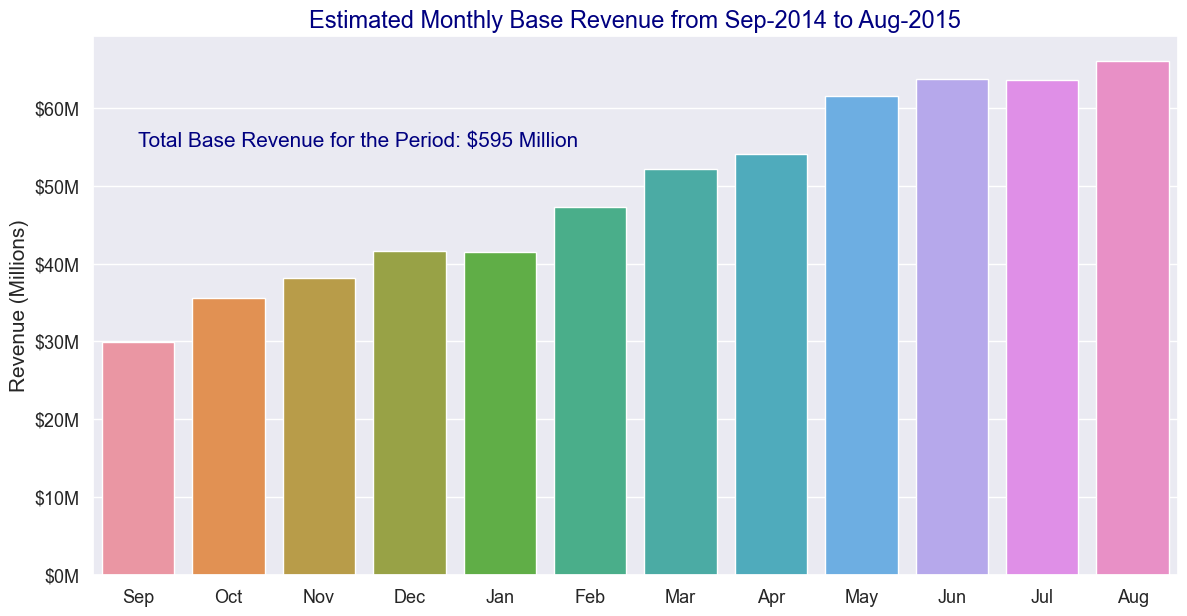

In [100]:
#Create chart showing total base revenue per month.
months_seq = [9,10,11,12,1,2,3,4,5,6,7,8]
formatter = FuncFormatter(millions_currency)

plt.figure(figsize = (14, 7))
ax = sns.barplot(x = byDateRev.index, y = byDateRev.values, order = months_seq)
ax.set_xticklabels(month_labels)
ax.yaxis.set_major_formatter(formatter)

font = {'color': 'navy', 'size': 15} #text parameters
plt.text(0, 55000000, 'Total Base Revenue for the Period: ${:,.0f} Million'.format(sumRev * 1e-6),
         fontdict = font) #params: x, y, text, fontdict
plt.xlabel('')
plt.ylabel('Revenue (Millions)', fontsize = 15)
plt.tick_params(labelsize=13)
plt.title('Estimated Monthly Base Revenue from Sep-2014 to Aug-2015', fontsize = 17, color='navy')

plt.show()


In [101]:
type(byDateRev.index)
byDateRev

pickup_month
1    41457151.3925
2    47252851.6517
3    52154385.1658
4    54095066.2220
5    61539912.0576
6    63667665.6637
7    63607348.4417
8    65961099.2575
9    29932281.9150
10   35531000.9392
11   38170686.8242
12   41661568.5867
Name: est_revenue, dtype: float64

In [102]:
df_viz.est_revenue.mean()

19.241869694753472

* It’s important to note that from the gross estimated revenue, Uber’s share is about 25% of the total. Therefore, we can conservatively estimate that Uber’s gross margin in NYC from September 2014 to August 2015 was in the order of **150 million  dollars**. The estimated gross margin, considering instead the 27 average fare previously mentioned, was of the order of **210 million dollars**.
* **Total revenue** of Uber in 1 Year is **595M and Gross margin of 149M**.
* In bar plot we observed that revenue per month generally increases month by month in that period except the month of january and june, this may happened because of 2 Federal holiday's in month of january and summer vacation started from july.  

In [103]:
# Month over Month Base Revenue Growth: how fast has Uber grown in the period?
#Create dictionary with calculated month over month revenue percentage growth:
dict_growth = {}
for i in range(len(months_seq)):
    mo = months_seq[i]
    rev = byDateRev[mo]
    if mo == 9:
        growth_pct = 0
    elif mo == 1:
        growth_pct = ((rev/byDateRev[12]) - 1) * 100
    else:
        growth_pct = ((rev/byDateRev[mo - 1]) - 1) * 100
    print(month_labels[i], 'Revenue =', '${:,.0f}'.format(rev), 'Growth % = ', '{:.1f}%'.format(growth_pct))
    dict_growth[month_labels[i]] = growth_pct

Sep Revenue = $29,932,282 Growth % =  0.0%
Oct Revenue = $35,531,001 Growth % =  18.7%
Nov Revenue = $38,170,687 Growth % =  7.4%
Dec Revenue = $41,661,569 Growth % =  9.1%
Jan Revenue = $41,457,151 Growth % =  -0.5%
Feb Revenue = $47,252,852 Growth % =  14.0%
Mar Revenue = $52,154,385 Growth % =  10.4%
Apr Revenue = $54,095,066 Growth % =  3.7%
May Revenue = $61,539,912 Growth % =  13.8%
Jun Revenue = $63,667,666 Growth % =  3.5%
Jul Revenue = $63,607,348 Growth % =  -0.1%
Aug Revenue = $65,961,099 Growth % =  3.7%


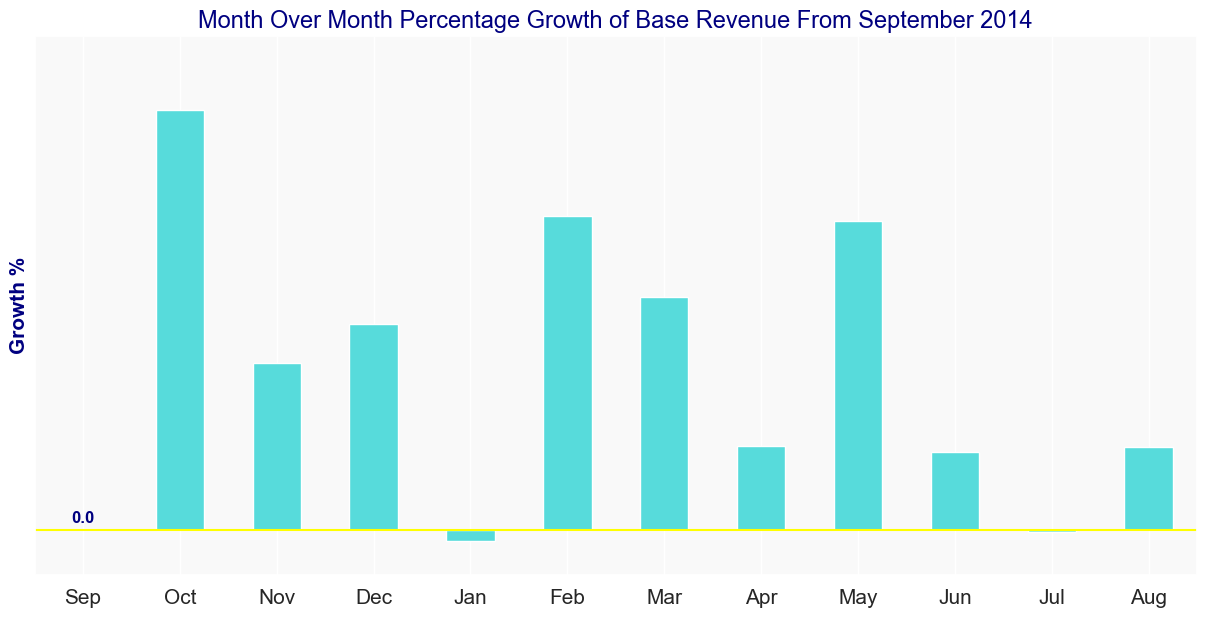

In [104]:
#Annotate Total Cummulative Growth for the Period

df_plt1 = pd.DataFrame(pd.Series(dict_growth), index = month_labels, columns = ['growth_pct'])

labels_list = df_plt1.growth_pct.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt1.plot(kind = 'bar', figsize = (15,7), fontsize = 14, rot = 0, legend=False)#df_plt2[1:] to exclude Sep
ax.set_facecolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.axhline(0, color='yellow')
plt.title('Month Over Month Percentage Growth of Base Revenue From September 2014',
          fontsize = 17, color='navy')
plt.ylabel('Growth %', fontsize = 15, weight='bold', color='navy')
plt.ylim(-2, 22)
plt.tick_params(labelsize=15)

plt.show()

Cummulative % Growth Over Period: 83.68839597688877


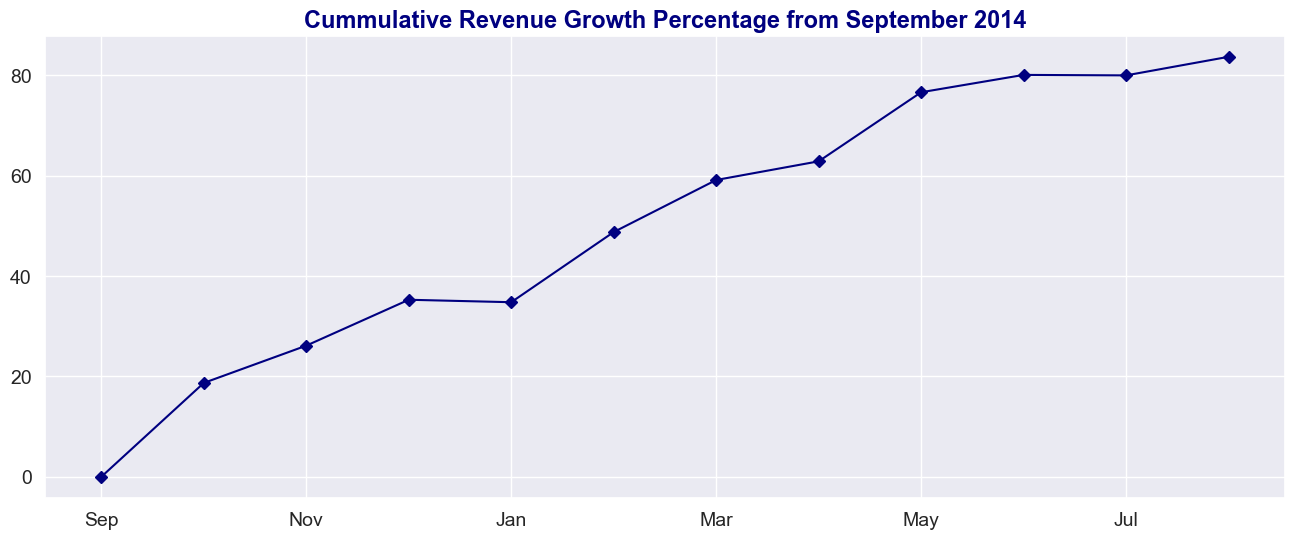

In [105]:
#Plot Cummulative Base Revenue Growth Over the Period
print('Cummulative % Growth Over Period:', df_plt1.growth_pct.sum())

df_plt1.cumsum().plot(color = 'navy', marker = 'D', legend = False, figsize=(16, 6))
plt.title('Cummulative Revenue Growth Percentage from September 2014', fontsize=17, weight='bold', color='navy')
plt.tick_params(labelsize=14)
plt.show()

* In above two cells of code we get to know that revenue per month generally increases month by month in that period except the month of january and june, this may be happened because of 2 Federal holiday's in month of january and summer vacation started from july.
* We get to know that revenue increased by **~84%** in a period of one year.

# Which day of the week has the worst (slowest) traffic overall?

In [111]:
#Create dataframe with grouped data.
df_plt2 = df_viz.groupby('pickup_weekday')['trip_mph_avg'].median() #used median since distribution is skewed.

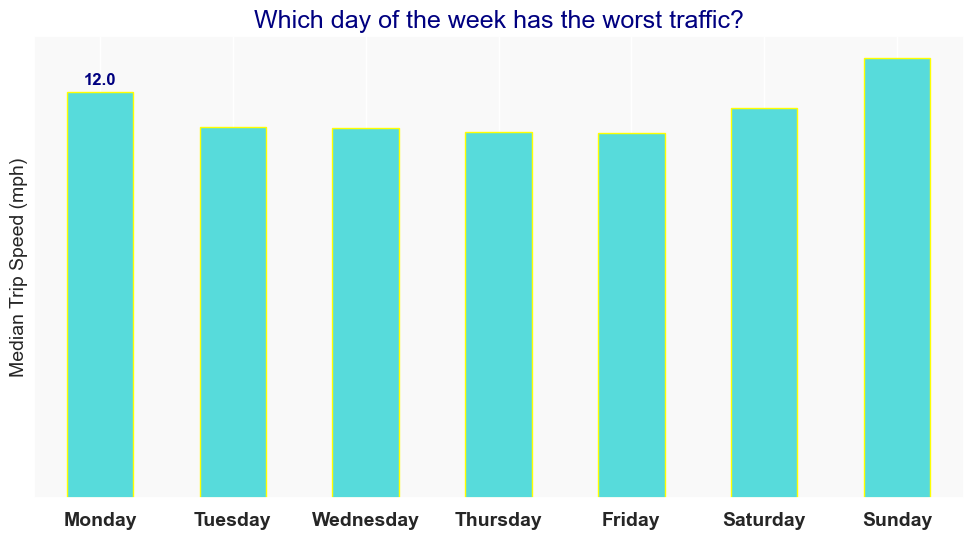

In [110]:
#Create plot. Does Saturday have better traffic flow than Monday?

fig = plt.figure()
labels_list = df_plt2.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt2.plot(kind='bar', rot = 0, figsize = (12, 6), fontsize = 12, edgecolor='yellow', linewidth=1)
ax.set_xticklabels(weekday_labels, weight='bold')
ax.set_facecolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.xlabel('')
plt.ylabel('Median Trip Speed (mph)', fontsize = 14)
plt.tick_params(labelsize=14)
plt.title('Which day of the week has the worst traffic?', fontsize = 18, color='navy')
plt.show()
#plot_url = py.plot_mpl(fig)

* Monday seems to have slightly better flow than the other weekdays, and particularly better than Saturday. As expected, Sunday has the lightest traffic.

## What is the median distance traveled per trip? Are there any insights we can learn from it?

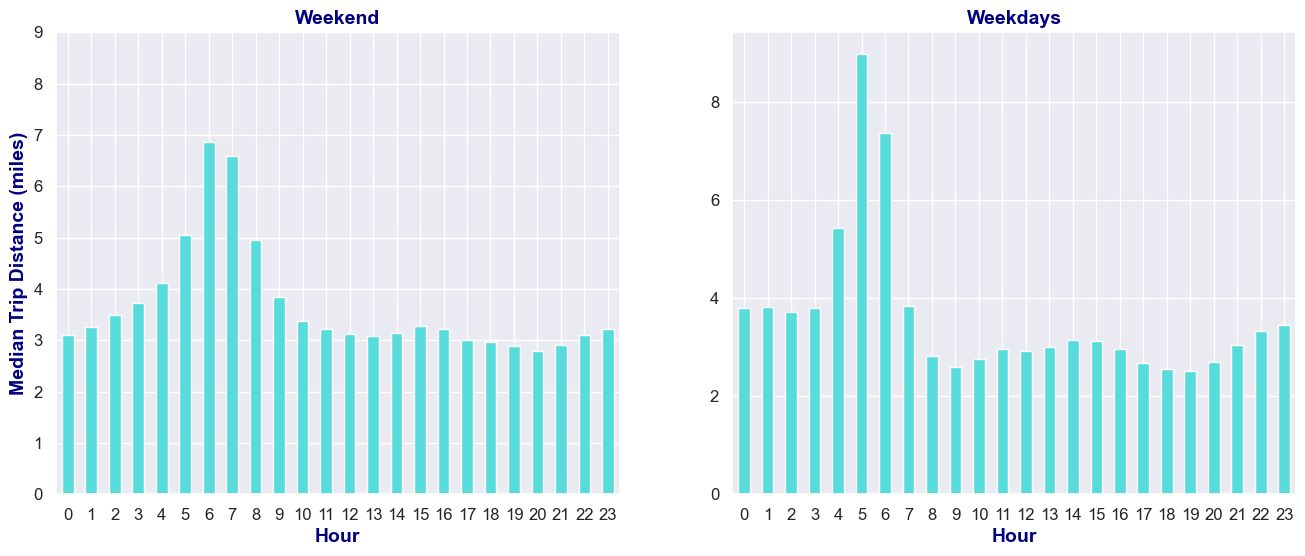

In [112]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
df_viz[(df_viz.pickup_weekday >= 5)].groupby('pickup_hour')['trip_distance'].median().plot(kind='bar', rot = 0, fontsize=14)
plt.ylim(0, 9)
plt.tick_params(labelsize=12)
plt.ylabel('Median Trip Distance (miles)', fontsize=14, weight='bold', color='navy')
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekend', fontsize=14, weight='bold', color='navy')

plt.subplot(1,2,2)
df_viz[df_viz.pickup_weekday < 5].groupby('pickup_hour')['trip_distance'].median().plot(kind='bar', rot = 0)
plt.tick_params(labelsize=12)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekdays', fontsize=14, weight='bold', color='navy')

plt.show()

* Why is the median distance traveled around 5 AM much longer than at the other times?Could it be picking up riders that would otherwise use public transportation to the outer boroughs?
* While the subway runs 24/7 in NYC, bus services don't. It's clear though that most customer are within Manhattan.

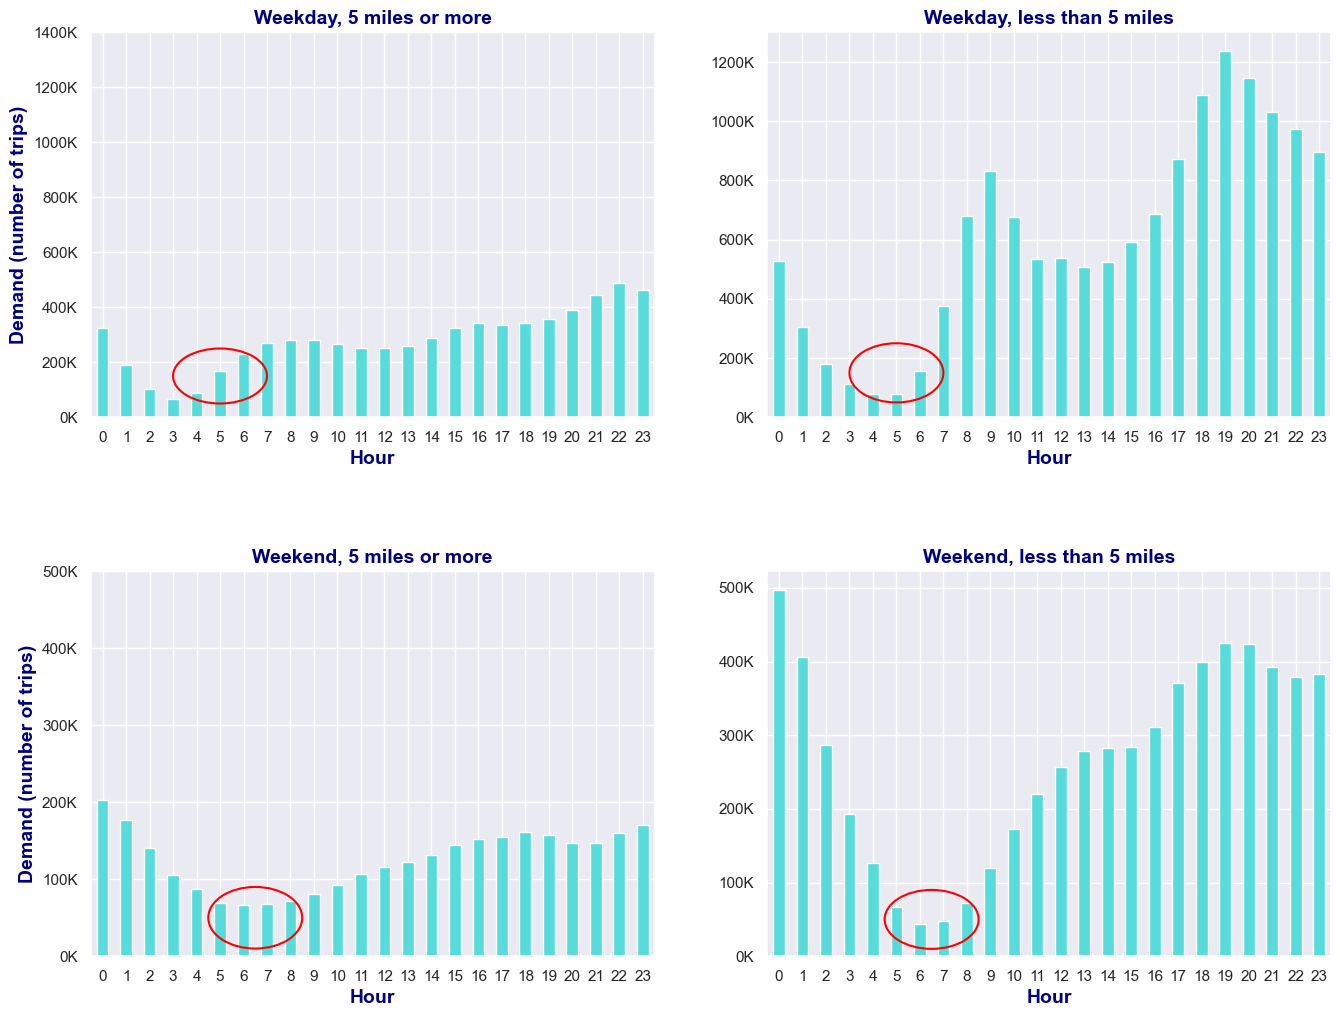

In [113]:
#Create plot similar to the above but with the count of trips per hour, comparing weekday vs weekend and
#distances >=5 versus < 5 miles. Indeed, the plots show that there is a higher demand for trips that go beyond
#miles (outside Manhattan) from 5 to 7 AM on weekdays, and from 6 to 8 AM on weekends (Saturday and Sunday).

fig = plt.figure(figsize = (16,12))
formatter = FuncFormatter(thousands_format)


plt.subplot(2,2,1)
ax1 = df_viz[(df_viz.pickup_weekday < 5) & (df_viz.trip_distance >= 5)].\
groupby('pickup_hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax1.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(5, 150000), width=4, height=200000, edgecolor='red', fc='None', lw=1.5)
ax1.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
plt.ylim(0, 1400000)
plt.title('Weekday, 5 miles or more', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,2)
ax2 = df_viz[(df_viz.pickup_weekday < 5) & (df_viz.trip_distance < 5)].\
groupby('pickup_hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax2.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(5, 150000), width=4, height=200000, edgecolor='red', fc='None', lw=1.5)
ax2.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekday, less than 5 miles', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,3)
ax3 = df_viz[(df_viz.pickup_weekday >= 5) & (df_viz.trip_distance >= 5)].\
groupby('pickup_hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax3.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(6.5, 50000), width=4, height=80000, edgecolor='red', fc='None', lw=1.5)
ax3.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
plt.ylim(0, 500000)
plt.title('Weekend, 5 miles or more', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,4)
ax4 = df_viz[(df_viz.pickup_weekday >= 5) & (df_viz.trip_distance < 5)].\
groupby('pickup_hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax4.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(6.5, 50000), width=4, height=80000, edgecolor='red', fc='None', lw=1.5)
ax4.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekend, less than 5 miles', fontsize=14, weight='bold', color='navy')


fig.subplots_adjust(hspace=0.4)
plt.show()
#plot_url = py.plot_mpl(fig)

* The red circles highlight the focus areas where the number of long trips is greater than the number of short trips, and this occurs both on weekdays and weekends, although at slightly different times: the demand is **higher for longer trips from about 5 to 7 AM on weekdays, and from 6 to 8 AM on weekends**

## What are the most popular pickup and drop-off taxi zones?

C:\Users\kaish\AppData\Local\Temp\ipykernel_16884\1532900493.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
C:\Users\kaish\AppData\Local\Temp\ipykernel_16884\1532900493.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])


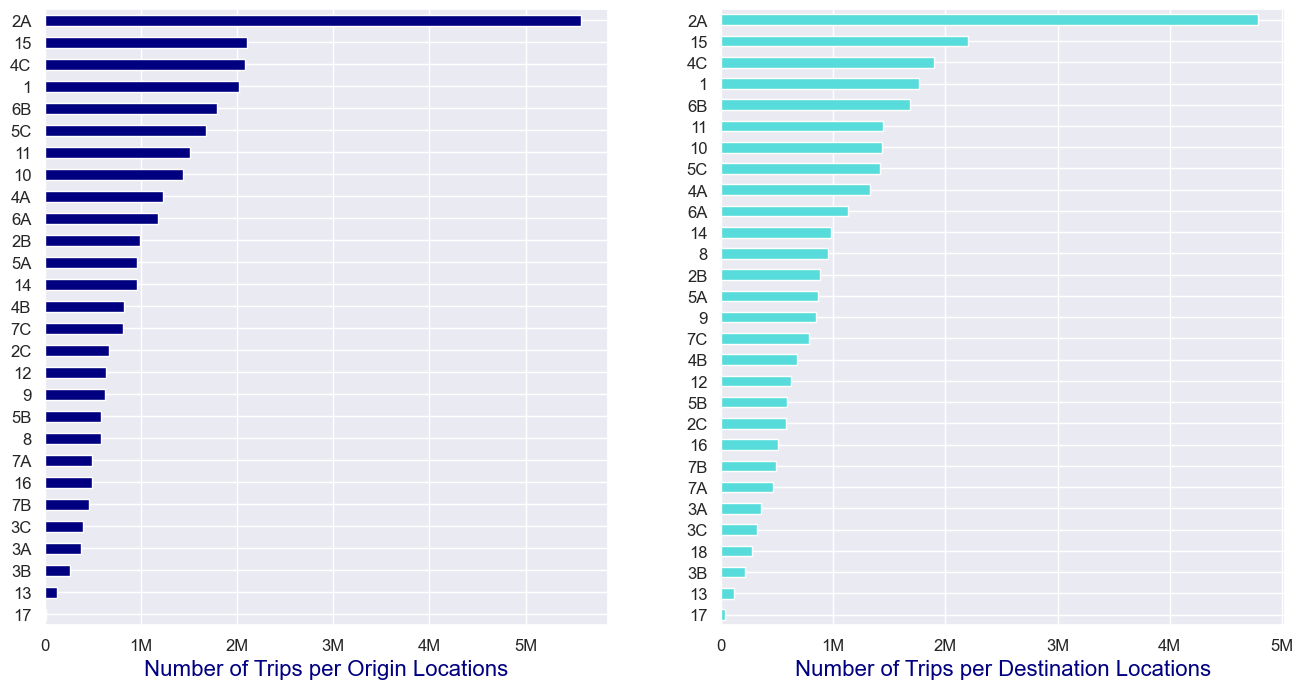

In [114]:
#CREATE INSTEAD SIDE-STACKED PLOT WITH TOP 10 PICKUP AND DROP-OFF LOCATIONS? OR TRY TOYPLOT WITH VALUE FOR EACH BAR.
fig = plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
ax1 = df_viz.origin_taz.value_counts(ascending = True).plot(kind = 'barh', color = 'navy')
ax1.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Origin Locations', fontsize = 16, color='navy')

plt.subplot(1,2,2) #note: it won't account missing values (4% of data)
ax2 = df_viz.destination_taz.value_counts(ascending = True).plot(kind = 'barh')
ax2.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Destination Locations', fontsize = 16, color='navy')

plt.show()
#plot_url = py.plot_mpl(fig)

* The top 5 locations for origin and destination are the same: 2A, 15, 4C, 1, and 6B (likely all in Manhattan).
* The top location for pick up and drop off, 2A, accounts for more than the total trips for the next two popular locations.
*  Top origin codes are **probably based in Manhattan**. In this case, the top **destination codes are also based in Manhattan**.

In [115]:
#Percentage of trips represented by the top five origins/destinations:
print(df_viz.origin_taz.value_counts().head(5).sum()/float(len(df_viz))) #13,583,249
print(df_viz.destination_taz.value_counts().head(5).sum()/float(len(df_viz[df_viz.destination_taz.isnull() == False])))

0.43922264570453473
0.41584985632479493


In [116]:
#Total pickups or drop-offs within any combination of the top 5 locations: 6231353 (20% of the total trips)
len(df_viz[(df_viz.origin_taz.isin(['2A', '15', '4C', '1', '6B']) == True) & \
           (df_viz.destination_taz.isin(['2A', '15', '4C', '1', '6B']) == True)])

6231353

In [117]:
#29% of all trips start or finish at 2A:
len(df_viz[(df_viz.origin_taz == '2A') | (df_viz.destination_taz == '2A')])/(1.0*len(df_viz)) #8979830

0.2903860697677705

* The most **popular pickup and drop-off locations are 2A**. In fact, **29%** of all Uber trips during the analyzed period have either started or ended in this zone.

## Visualizing the most popular pick up and drop off location pairs.

In [118]:
#Define data to plot:
df_plt3 = df_viz.pivot_table('id', aggfunc='count', index='origin_taz', columns='destination_taz')

In [119]:
df_plt3.shape

(28, 29)

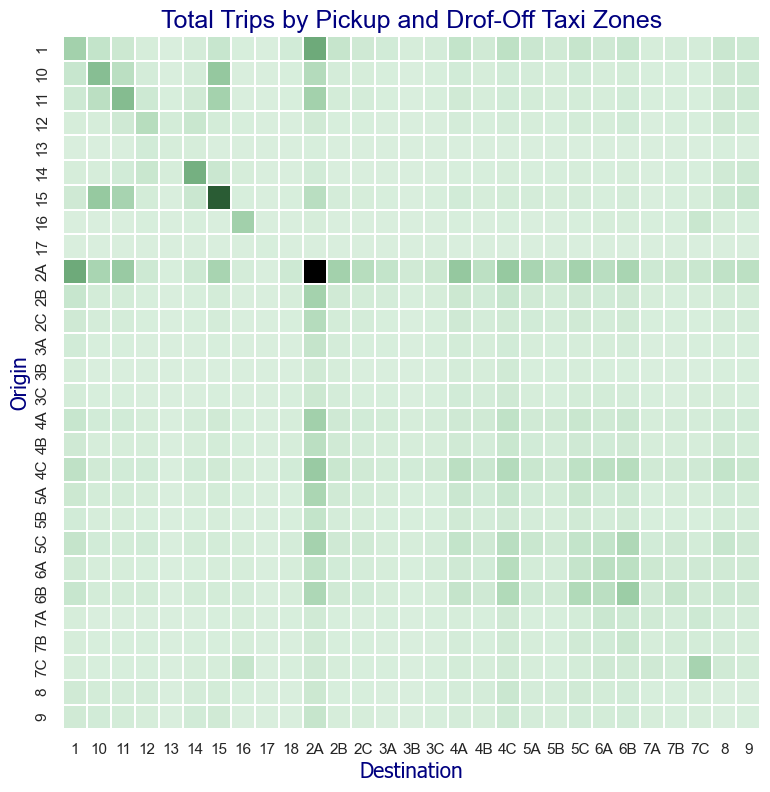

In [120]:
#Visualize the origin versus destination matrix via a heatmap:

fig = plt.figure(figsize=(9,9))

cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.9, as_cmap=True) #'YlOrRd' #ggplot:'viridis'

sns.heatmap(df_plt3, cmap=cmap, linewidths=0.1, cbar=False)

plt.title('Total Trips by Pickup and Drof-Off Taxi Zones', fontsize=18, color='navy')
plt.xlabel('Destination', fontsize=15, fontname='Tahoma', color='navy')
plt.ylabel('Origin', fontsize=15, fontname='Tahoma', color='navy')
plt.tick_params(labelsize=11)
plt.show()

In [121]:
len(df_viz[(df_viz.origin_taz.isin(['2A', '15', '4C', '1', '6B']) == True) & \
           (df_viz.destination_taz.isin(['2A', '15', '4C', '1', '6B']) == True)])

6231353

## What is the mean time and distance to destination from the most popular pick up location?

In [122]:
#Plot the mean travel time from the most popular origin, to all possible destinations.
df_plt4 = df_viz[df_viz.origin_taz == '2A'].groupby('destination_taz')['trip_distance'].mean().sort_values()
df_plt5 = df_viz[df_viz.origin_taz == '2A'].groupby('destination_taz')['duration_min'].mean().sort_values()

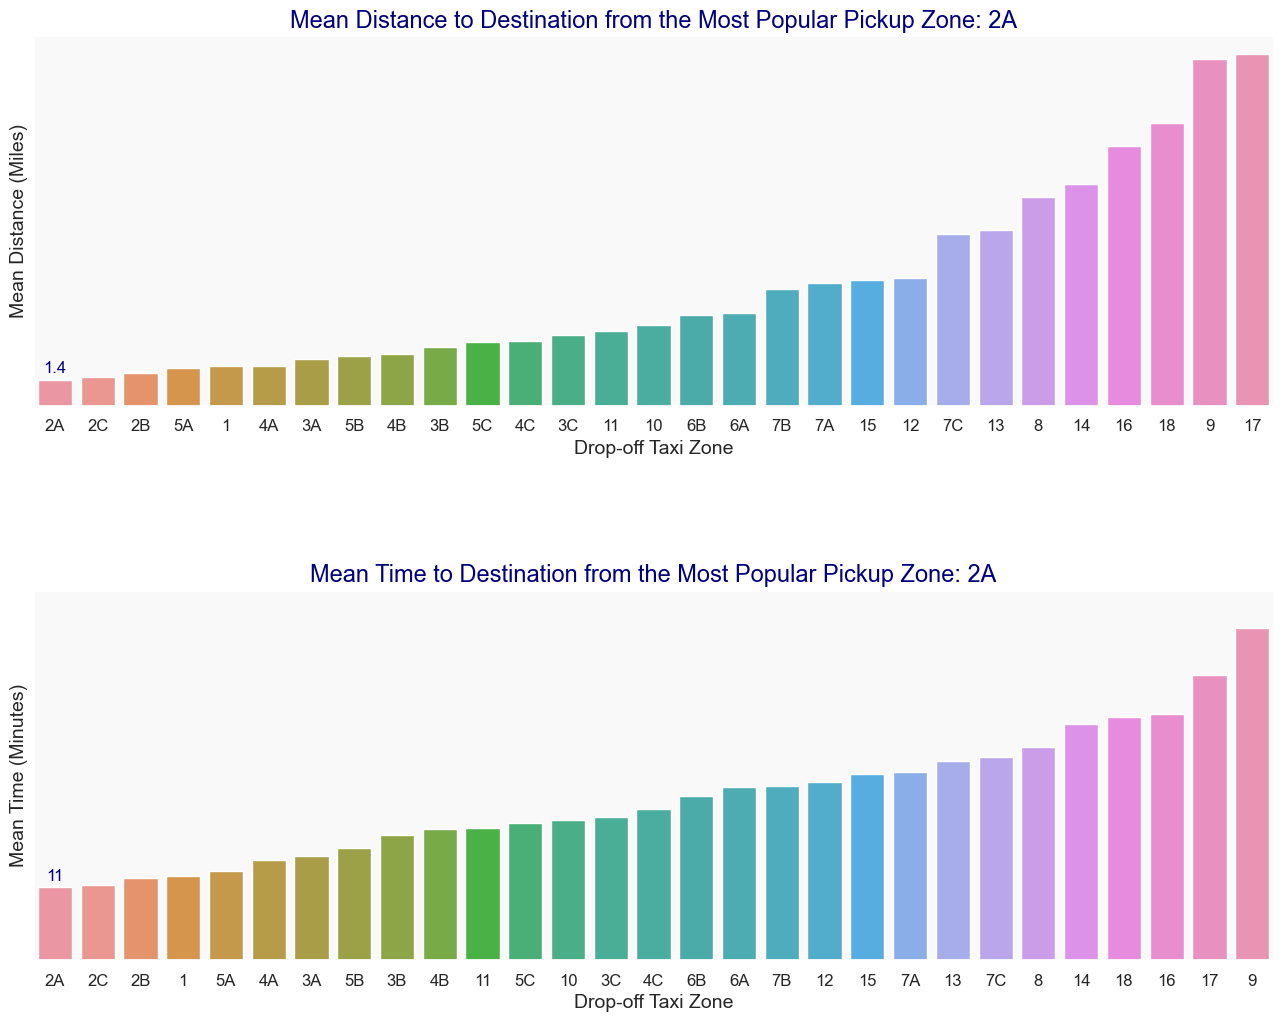

In [123]:
#Assuming 18 is EWR, and given the average driving distance from 2A, this pick up location is probably located in
#Midtown, not in Lower Manhattan (Penn Station lat/long: 40.750568, -73.993519)
#Straight line distance: 11 miles, Driving distance: 15 miles Difference: 36%
#The mean time and distance to zone 18 adds further evidence that it's the EWR airport (from Midtown).
#Based on the distance from 2A, if the origin is Midtown, then 15 is in Upper Manhattan.

fig = plt.figure(figsize = (16,12))
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'color': 'navy'}


plt.subplot(2,1,1)
ax1 = sns.barplot(x=df_plt4.index, y=df_plt4.values)
ax1.set_facecolor('#F9F9F9')
#ax1.set_yticks(range(0, 21, 2))
ax1.get_yaxis().set_ticks([])
labels_list = df_plt4.values.round(1)
annotate_labels(ax1, labels_list, **kwargs)
plt.title('Mean Distance to Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
plt.ylabel('Mean Distance (Miles)', fontsize = 14)
plt.xlabel('Drop-off Taxi Zone', fontsize=14)
plt.tick_params(labelsize=12)


plt.subplot(2,1,2)
ax2 = sns.barplot(x=df_plt5.index, y=df_plt5.values)
ax2.set_facecolor('#F9F9F9')
#ax2.set_yticks(range(0, 51, 5))
ax2.get_yaxis().set_ticks([])
labels_list = df_plt5.apply(lambda x: '{:.0f}'.format(round(x))).values
annotate_labels(ax2, labels_list, **kwargs)
plt.title('Mean Time to Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
plt.ylabel('Mean Time (Minutes)', fontsize = 14)
plt.ylim(0,55)
plt.xlabel('Drop-off Taxi Zone', fontsize=14)
plt.tick_params(labelsize=12)


fig.subplots_adjust(hspace=.5)
plt.show()
#plot_url = py.plot_mpl(fig)

* The charts above show the mean distance and time to destination for a trip originating at 2A.
* The data has 28 unique origin codes and 29 unique destination codes. Assuming that code 18, the extra destination code, represents the Newark Airport (EWR), a relevant destination outside of New York City, then we can infer that 2A is in Midtown, based on the mean time and distance to arrive at location 18.

* Given the concentrated demand within Manhattan, about 68% of all Uber trips have a driven distance of 5 miles or less.

## Visualization of Variable Distributions and Bivariate Relationships.

### Distribution of trip distance

In [125]:
df_viz.trip_distance.max(), df.trip_distance.max()

(568.57, 2593.08)

In [126]:
freq, bins_dist = np.histogram(df_viz.trip_distance, bins=10, range=(0, 25))
freq, bins_dist

(array([12709212,  8364039,  3566741,  2035261,  1296836,   672674,
          705998,   747728,   299927,   132566], dtype=int64),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]))

In [127]:
#69% of all trips had distance < 5 miles
for val in freq:
    print(float(val)/sum(freq))

0.4162726243132304
0.273952505032429
0.11682365801401344
0.06666215321865507
0.042476065787861
0.022032504555536406
0.023123985989052038
0.024490794301997885
0.009823693191394893
0.004342015595829836


In [128]:
df_viz.trip_distance.median(), df_viz.trip_distance.mean()

(3.09, 5.19963245654634)

In [129]:
print(len(df_viz[df_viz.trip_distance <= 5])/(1.0 *len(df_viz))) #68% of trips are 5 miles or less
print(len(df_viz[df_viz.trip_distance <= 2])/(1.0 *len(df_viz))) #32% of trips are 2 miles or less

0.6821384577290933
0.3192358898883037


In [130]:
#Vey long distance trips (>= 300 miles):
df_viz[df_viz.trip_distance >= 300].head(10) #45 total

,id,origin_taz,destination_taz,trip_distance,pu_date_hour,pickup_date,pickup_year,pickup_month,pickup_day,pickup_time,pickup_hour,pickup_weekday,duration_min,trip_mph_avg,est_revenue
943214,19594602,10,15,371.5500,2014-09-16 10:00:00,2014-09-16,2014,9,16,10:00:00,10,1,474.2833,47.0035,818.7617
3620586,5138875,14,NaN,357.2700,2014-11-04 23:00:00,2014-11-04,2014,11,4,23:00:00,23,1,309.5167,69.2570,736.1033
10581718,10072444,16,NaN,330.9000,2015-02-04 18:00:00,2015-02-04,2015,2,4,18:00:00,18,2,648.5000,30.6153,808.6000
11224977,17353914,15,15,378.0100,2015-02-25 15:00:00,2015-02-25,2015,2,25,15:00:00,15,2,600.7667,37.7528,874.3358
11684172,23119455,14,14,350.1500,2015-02-03 18:00:00,2015-02-03,2015,2,3,18:00:00,18,1,559.3500,37.5597,811.0850
13829799,16426984,15,NaN,568.5700,2015-03-27 19:00:00,2015-03-27,2015,3,27,19:00:00,19,4,652.3167,52.2970,1225.8583
16530542,15478567,7A,17,315.5700,2015-04-09 01:00:00,2015-04-09,2015,4,9,01:00:00,1,3,248.0667,76.3271,641.6208
18643154,6860856,5C,16,308.4200,2015-05-31 05:00:00,2015-05-31,2015,5,31,05:00:00,5,6,304.1833,60.8357,648.7492
18854980,9245564,15,15,302.7900,2015-05-10 22:00:00,2015-05-10,2015,5,10,22:00:00,22,6,441.6667,41.1337,687.0158
18949729,10208984,4A,7C,335.3000,2015-05-09 16:00:00,2015-05-09,2015,5,9,16:00:00,16,5,813.6667,24.7251,874.1083


### Distribution of trip duration (in minutes)

In [131]:
#Median trip duration is ~ 17 minutes
df_viz.duration_min.describe()

count   30923763.0000
mean          20.9923
std           16.0846
min            0.0000
25%           10.8500
50%           17.2333
75%           26.6833
max          959.3000
Name: duration_min, dtype: float64

In [132]:
freq, bins_dur = np.histogram(df_viz.duration_min, bins=10, range=(0, 50))
freq, bins_dur

(array([1235100, 5391133, 6311894, 5266617, 3929001, 2777037, 1878313,
        1256118,  852522,  589907], dtype=int64),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]))

### Plot of the histograms for trip distance and duration

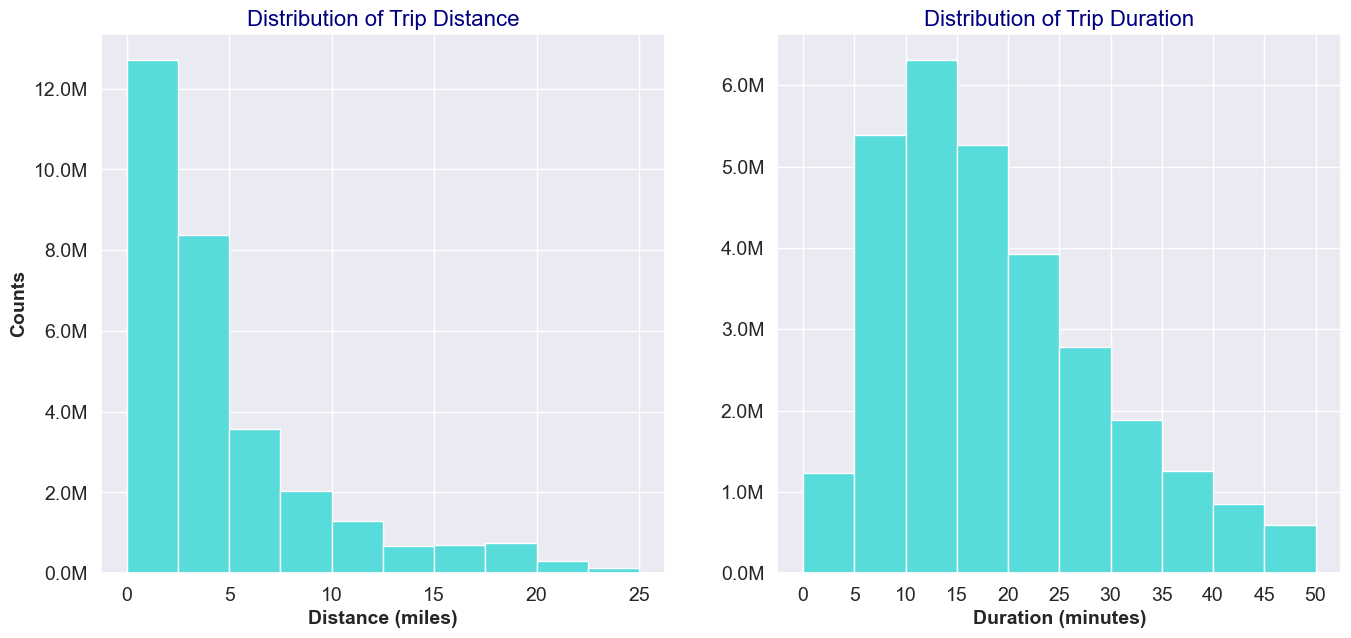

In [133]:
#Here we plot the distribution of trip duration next to the histogram of trip distance for comparison.
fig = plt.figure(figsize=(16, 7))

formatter = FuncFormatter(millions_format)

plt.subplot(1,2,1)
ax1 = df_viz.trip_distance.dropna().hist(bins=bins_dist)
ax1.yaxis.set_major_formatter(formatter)

plt.xlabel('Distance (miles)', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip Distance', color='navy', fontsize=16)


plt.subplot(1,2,2)
ax2 = df_viz.duration_min.hist(bins=bins_dur)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_xticks(bins_dur) #bins are in 5 minutes intervals.

plt.xlabel('Duration (minutes)', fontsize=14, weight='bold')
plt.ylabel('')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip Duration', color='navy', fontsize=16)

plt.show()

* The histograms above illustrate the distribution of the distance and duration of Uber trips.

# Trip Distance versus Trip Duration


In [134]:
#Create data to plot with average distance and duration grouped by origin-destination location pairs:
df_plt6 = df_viz.groupby(['origin_taz', 'destination_taz'])['trip_distance', 'duration_min'].mean()
df_plt6.values

C:\Users\kaish\AppData\Local\Temp\ipykernel_16884\4237613026.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_plt6 = df_viz.groupby(['origin_taz', 'destination_taz'])['trip_distance', 'duration_min'].mean()


array([[ 1.4180704 , 10.56080168],
       [ 3.65081289, 17.97784922],
       [ 5.09364295, 22.49040273],
       ...,
       [19.84848465, 44.5050345 ],
       [12.19842835, 29.74001046],
       [ 2.52056516,  9.87329898]])

In [135]:
df_plt6.shape #distance, duration (x, y): Fit function to replace 7 incorrect duration entries with estimate.

(812, 2)

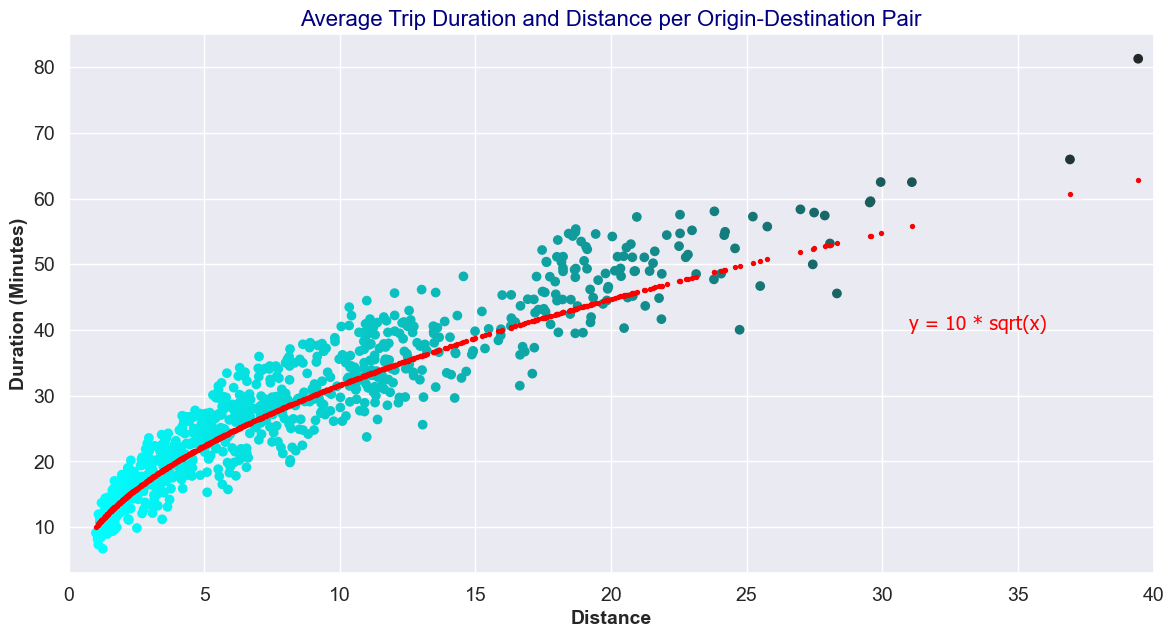

In [136]:

#Create plot.
distance = df_plt6.values[:,:1]
duration = df_plt6.values[:,1:]
duration_hat = pd.Series(distance.reshape(812,)).apply(lambda x: 10*np.sqrt(x))

plt.figure(figsize = (14,7))
cmap = sns.dark_palette('cyan', 3, reverse = True, as_cmap=True)

plt.scatter(distance, duration, c=distance, cmap= cmap) # it looks like a 10*sqrt(x) power distribution
plt.scatter(distance, duration_hat, color='red', s=8)

font = {'color': 'red', 'size': 14, 'family': 'Tahoma'}
plt.text(31, 40, 'y = 10 * sqrt(x)', fontdict = font)
plt.xlim(0, 40)
plt.xlabel('Distance', fontsize = 14, weight='bold')
plt.ylabel('Duration (Minutes)', fontsize = 14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Average Trip Duration and Distance per Origin-Destination Pair', fontsize = 16, color='navy')


plt.show()
#The relation between a trip’s duration and distance is not entirely linear. Rather, it approximates to a power function because the shorter trips, occurring mostly within busy areas of traffic, tend to result in lower average trip speed.

The relation between a trip’s duration and distance is not entirely linear. Rather, it approximates to a power function because the shorter trips, occurring mostly within busy areas of traffic, tend to result in lower average trip speed.

In [137]:
df_plt6[df_plt6.trip_distance > 25] #origin and destination pairs whose distance between them is greater than 25 miles

trip_distance  duration_min
origin_taz destination_taz                             
13         18                     28.0717       53.1685
14         17                     27.8808       57.4252
           18                     29.9431       62.5171
16         17                     31.0922       62.5046
           18                     28.3292       45.5679
17         14                     27.4876       57.8793
           16                     39.4353       81.2769
           7C                     25.2298       57.2576
           9                      25.5005       46.6947
7A         17                     29.5695       59.6055
7C         17                     26.9832       58.3610
8          17                     25.7619       55.7408
           18                     29.5376       59.4060
9          17                     27.4381       49.9894
           18                     36.9205       65.9577

### Distribution of the average speed per trip

In [138]:
#Note: this uses processed data (24904 (0.08%) entries with null or zero in duration resulted in null value for speed)
df_viz.trip_mph_avg.describe()

count   30898897.0000
mean          13.5071
std           11.7569
min            0.0000
25%            8.4098
50%           11.4488
75%           16.2667
max        22548.0000
Name: trip_mph_avg, dtype: float64

In [139]:
freq, bins = np.histogram(df_viz.trip_mph_avg, bins=10, range=(0, 50))
freq, bins

(array([ 1313433, 10564782,  9861693,  4248216,  2152654,  1281911,
          767746,   434298,   196149,    61858], dtype=int64),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]))

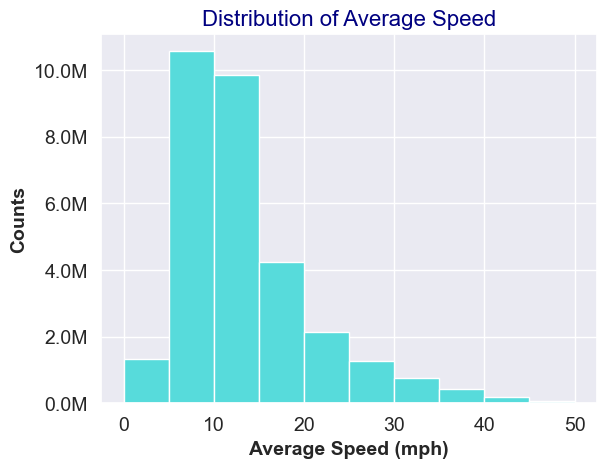

In [140]:
fig, ax = plt.subplots(1,1)

formatter = FuncFormatter(millions_format)

ax.hist(df_viz.trip_mph_avg.dropna(), bins)
ax.yaxis.set_major_formatter(formatter)

plt.xlabel('Average Speed (mph)', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Average Speed', color='navy', fontsize=16)
plt.show()

In [144]:
#Median trip average speed during weekdays:
df_plt7 = df_viz[df_viz.pickup_weekday < 5].groupby('pickup_hour')['trip_mph_avg'].median()
df_plt7.head()

pickup_hour
0   14.3002
1   15.3747
2   16.1274
3   16.6125
4   19.5019
Name: trip_mph_avg, dtype: float64

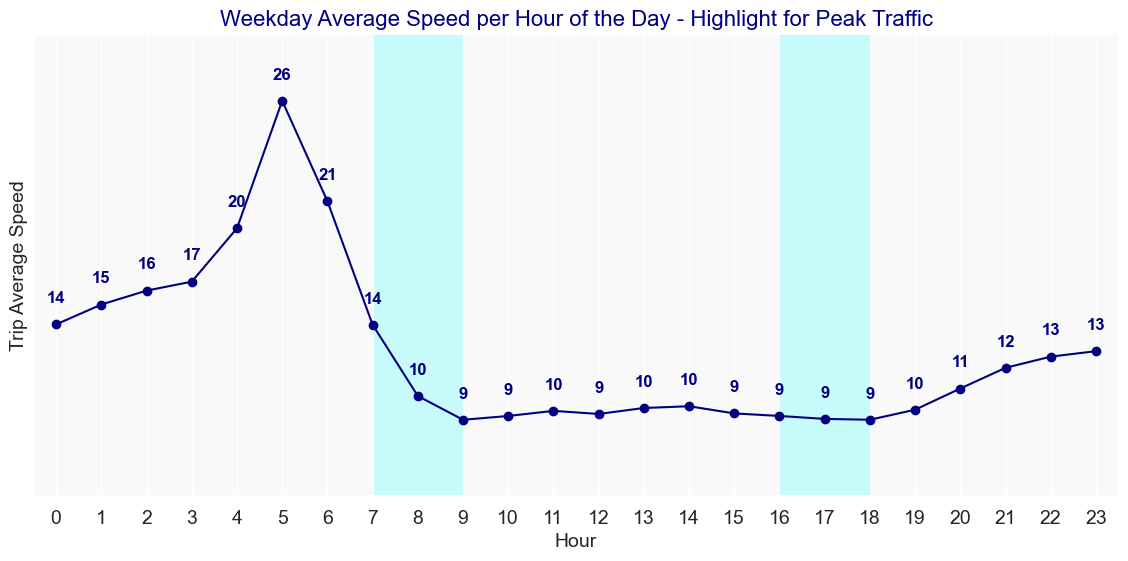

In [145]:
#Plot Peak Hour Median Trip Average Speed During Weekdays:

plt.figure(figsize =(14, 6))
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'top', 'color': 'navy', 'weight': 'bold'}

#weekdays only: rush hour traffic 7-9 + 16-18
ax = df_plt7.plot(marker = 'o', color = 'navy')

for x, y in zip(df_plt7.index, df_plt7.values):
    ax.annotate('{:.0f}'.format(y), xy=(x, y), xytext= (0, 24), textcoords='offset points', **kwargs)

ax.set_facecolor('#F9F9F9')
ax.get_yaxis().set_ticks([]) #hide tick labels on y-axis
plt.fill([7,9,9,7], [0,0,30,30], 'cyan', alpha=0.2)
plt.fill([16,18,18,16], [0,0,30,30], 'cyan', alpha=0.2)
plt.xticks(range(24))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Trip Average Speed', fontsize=14)
plt.ylim(5, 30)
plt.xlim(-0.5, 23.5)
plt.tick_params(labelsize=14)
plt.title('Weekday Average Speed per Hour of the Day - Highlight for Peak Traffic', fontsize = 16, color='navy')
plt.show()

In [146]:
def is_peak_hour(x):
    """
    Function that takes an array(x) with two integers representing
    hour of the day and weekday, respectively, and
    returns 1 if it's peak hour as defined, 0 otherwise.
    """
    return 1 if x[0] in (7,8,9,16,17,18) and x[1] < 5 else 0 #total peak hour periods = 6h

In [147]:
df_viz['peak_hour'] = pd.Series(map(lambda x: is_peak_hour(x), df_viz.loc[:, ['pickup_hour', 'pickup_weekday']].values))

C:\Users\kaish\AppData\Local\Temp\ipykernel_16884\3465680104.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(handles, labels=['Peak', 'Off Peak'], loc='best', fontsize=13)


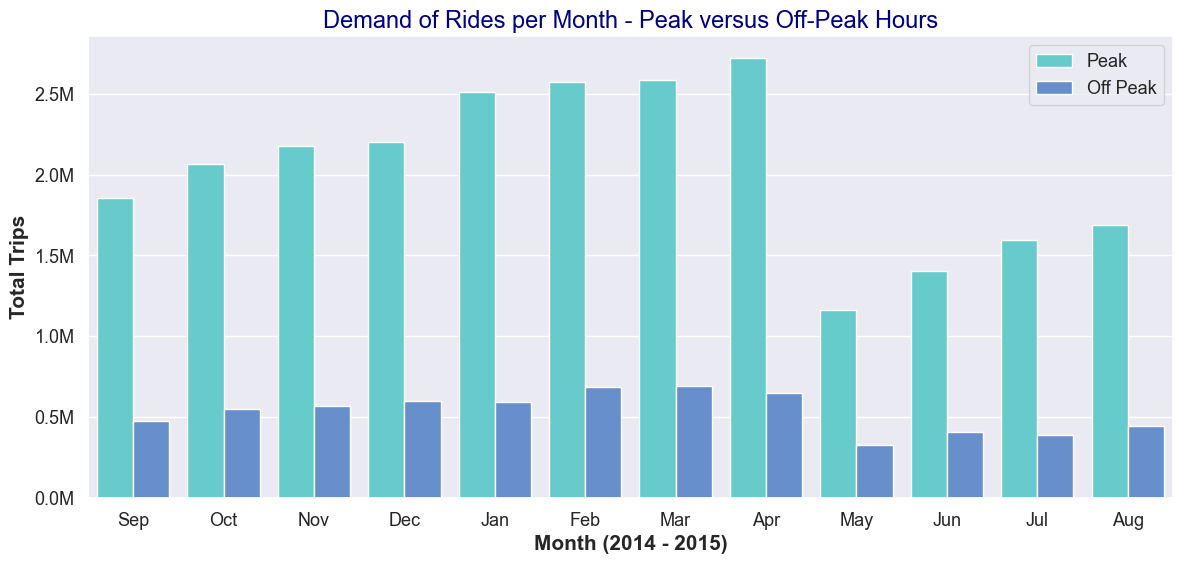

In [149]:
#Plot the total number of trips per month during peak hours and off-peak hours.
#Count for peak hours must represent more than 25% (6h) of the total rides to be more significant than non-peak hours.
plt.figure(figsize = (14, 6))
formatter = FuncFormatter(millions_format)

#to add labels and operate on data, use pivot instead of countplot directly with hue.
ax = sns.countplot(x = df_viz['pickup_month'], hue = df_viz['peak_hour'])
ax.set_xticklabels(month_labels)
ax.yaxis.set_major_formatter(formatter)

handles, labels = ax.get_legend_handles_labels() #will cause the warning msg that can be ignored
plt.legend(handles, labels=['Peak', 'Off Peak'], loc='best', fontsize=13)
plt.tick_params(labelsize=13)
plt.xlabel('Month (2014 - 2015)', fontsize = 15, weight='bold')
plt.ylabel('Total Trips', fontsize = 15, weight='bold')
plt.title('Demand of Rides per Month - Peak versus Off-Peak Hours', fontsize = 17, color='navy')
plt.show()